# Installing Necessary Libraries

In [ ]:
!pip install ultralytics
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.7/901.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


# Importings

In [ ]:
import os
import glob
from IPython.display import Image, display
from roboflow import Roboflow
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
ultralytics.checks()

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 32.7/235.7 GB disk)


# Creating a Helper Variable

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


# Importing Dataset from roboflow

In [ ]:
!mkdir {HOME}/datasets

In [ ]:
%cd /{HOME}/datasets

/content/datasets


In [ ]:

rf = Roboflow(api_key="6UsKKfSYWzTzDJqeepdS")
project = rf.workspace("roboflow-100").project("road-signs-6ih4y")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to road-signs-2 in yolov11:: 100%|██████████| 4198/4198 [00:00<00:00, 7345.56it/s]


# Training the YOLOv11 Model on Custom Dataset

In [ ]:
%cd {HOME}

model = YOLO('yolo11s.pt')  
model.train(
    data="/content/datasets/road-signs-2/data.yaml",  
    epochs=100,  
    imgsz=640    
)

#? Alternative approach to train yolo model on the dataset
# !yolo task=detect mode=train model=yolo11s.pt data = "/content/datasets/road-signs-2/data.yaml" epochs= 100 imgsz=640


/content
100% 18.4M/18.4M [00:00<00:00, 142MB/s] 
Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/road-signs-2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, 

# Checking the Files in the Training Directory

In [ ]:
!ls {HOME}/runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1734788272.1fde6bdcc3fe.7413.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch7740.jpg  weights
P_curve.png					    train_batch7741.jpg
PR_curve.png					    train_batch7742.jpg


# Printing the Confusion Matrix

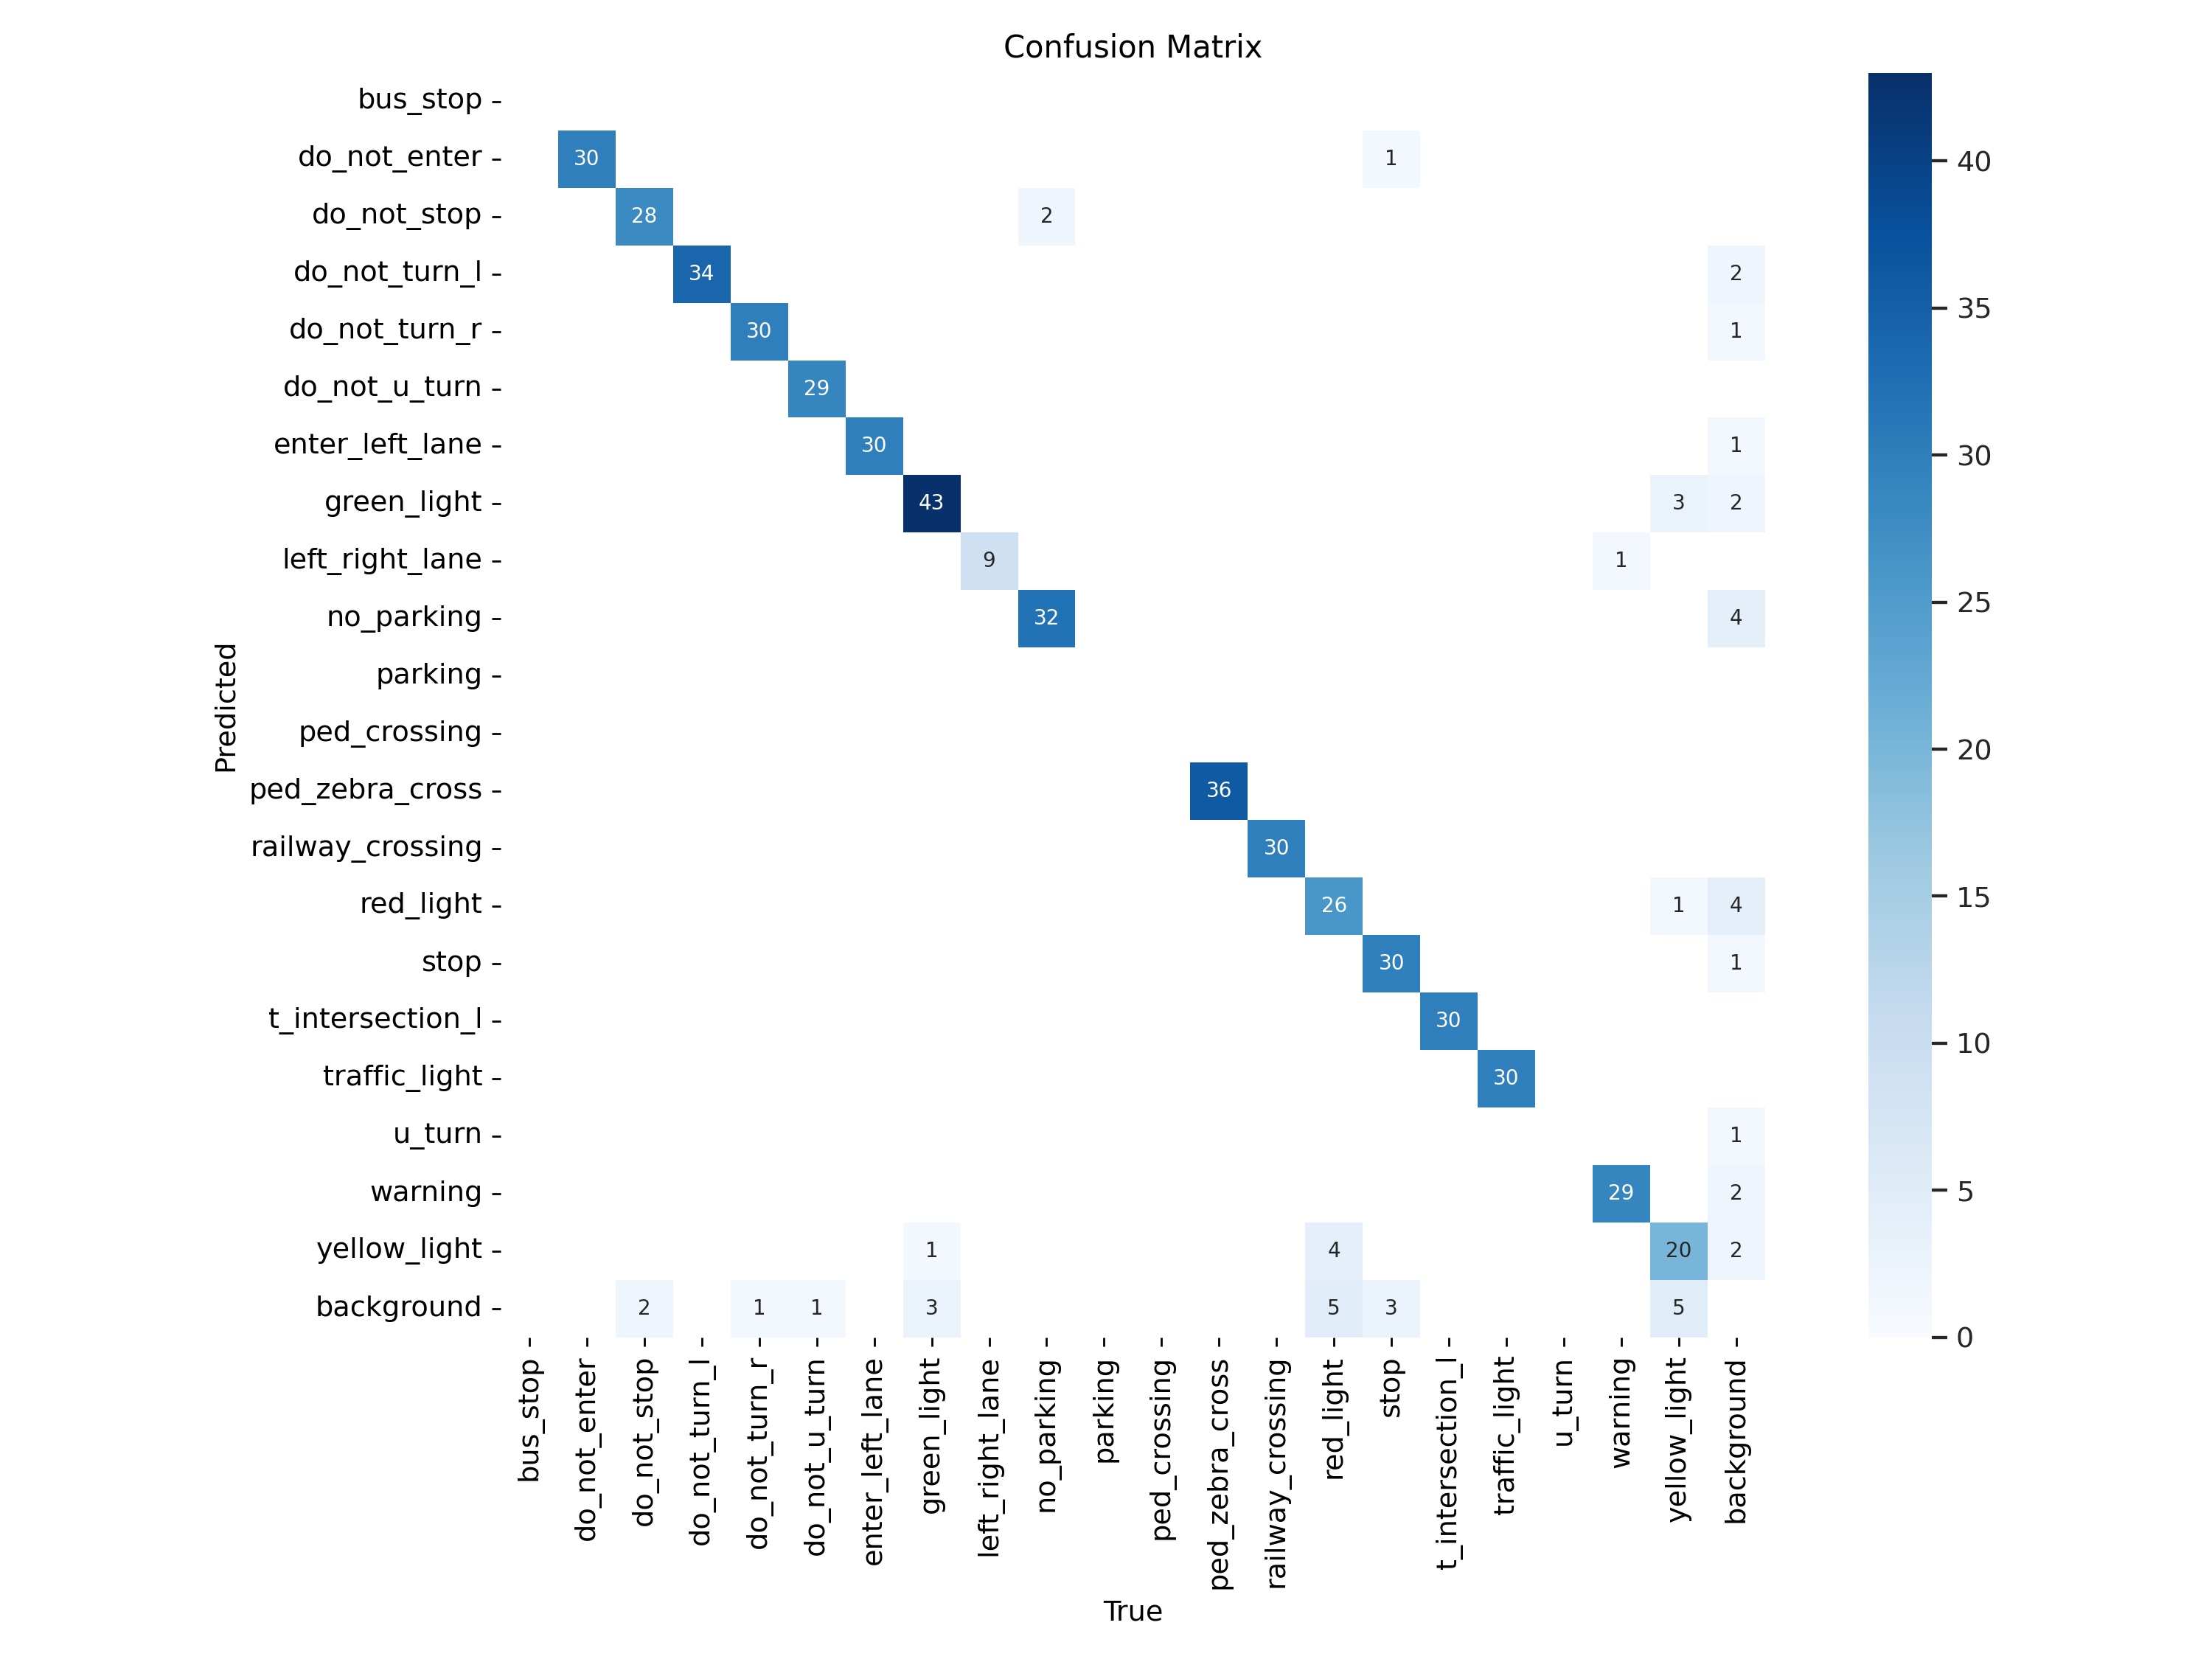

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/confusion_matrix.png")

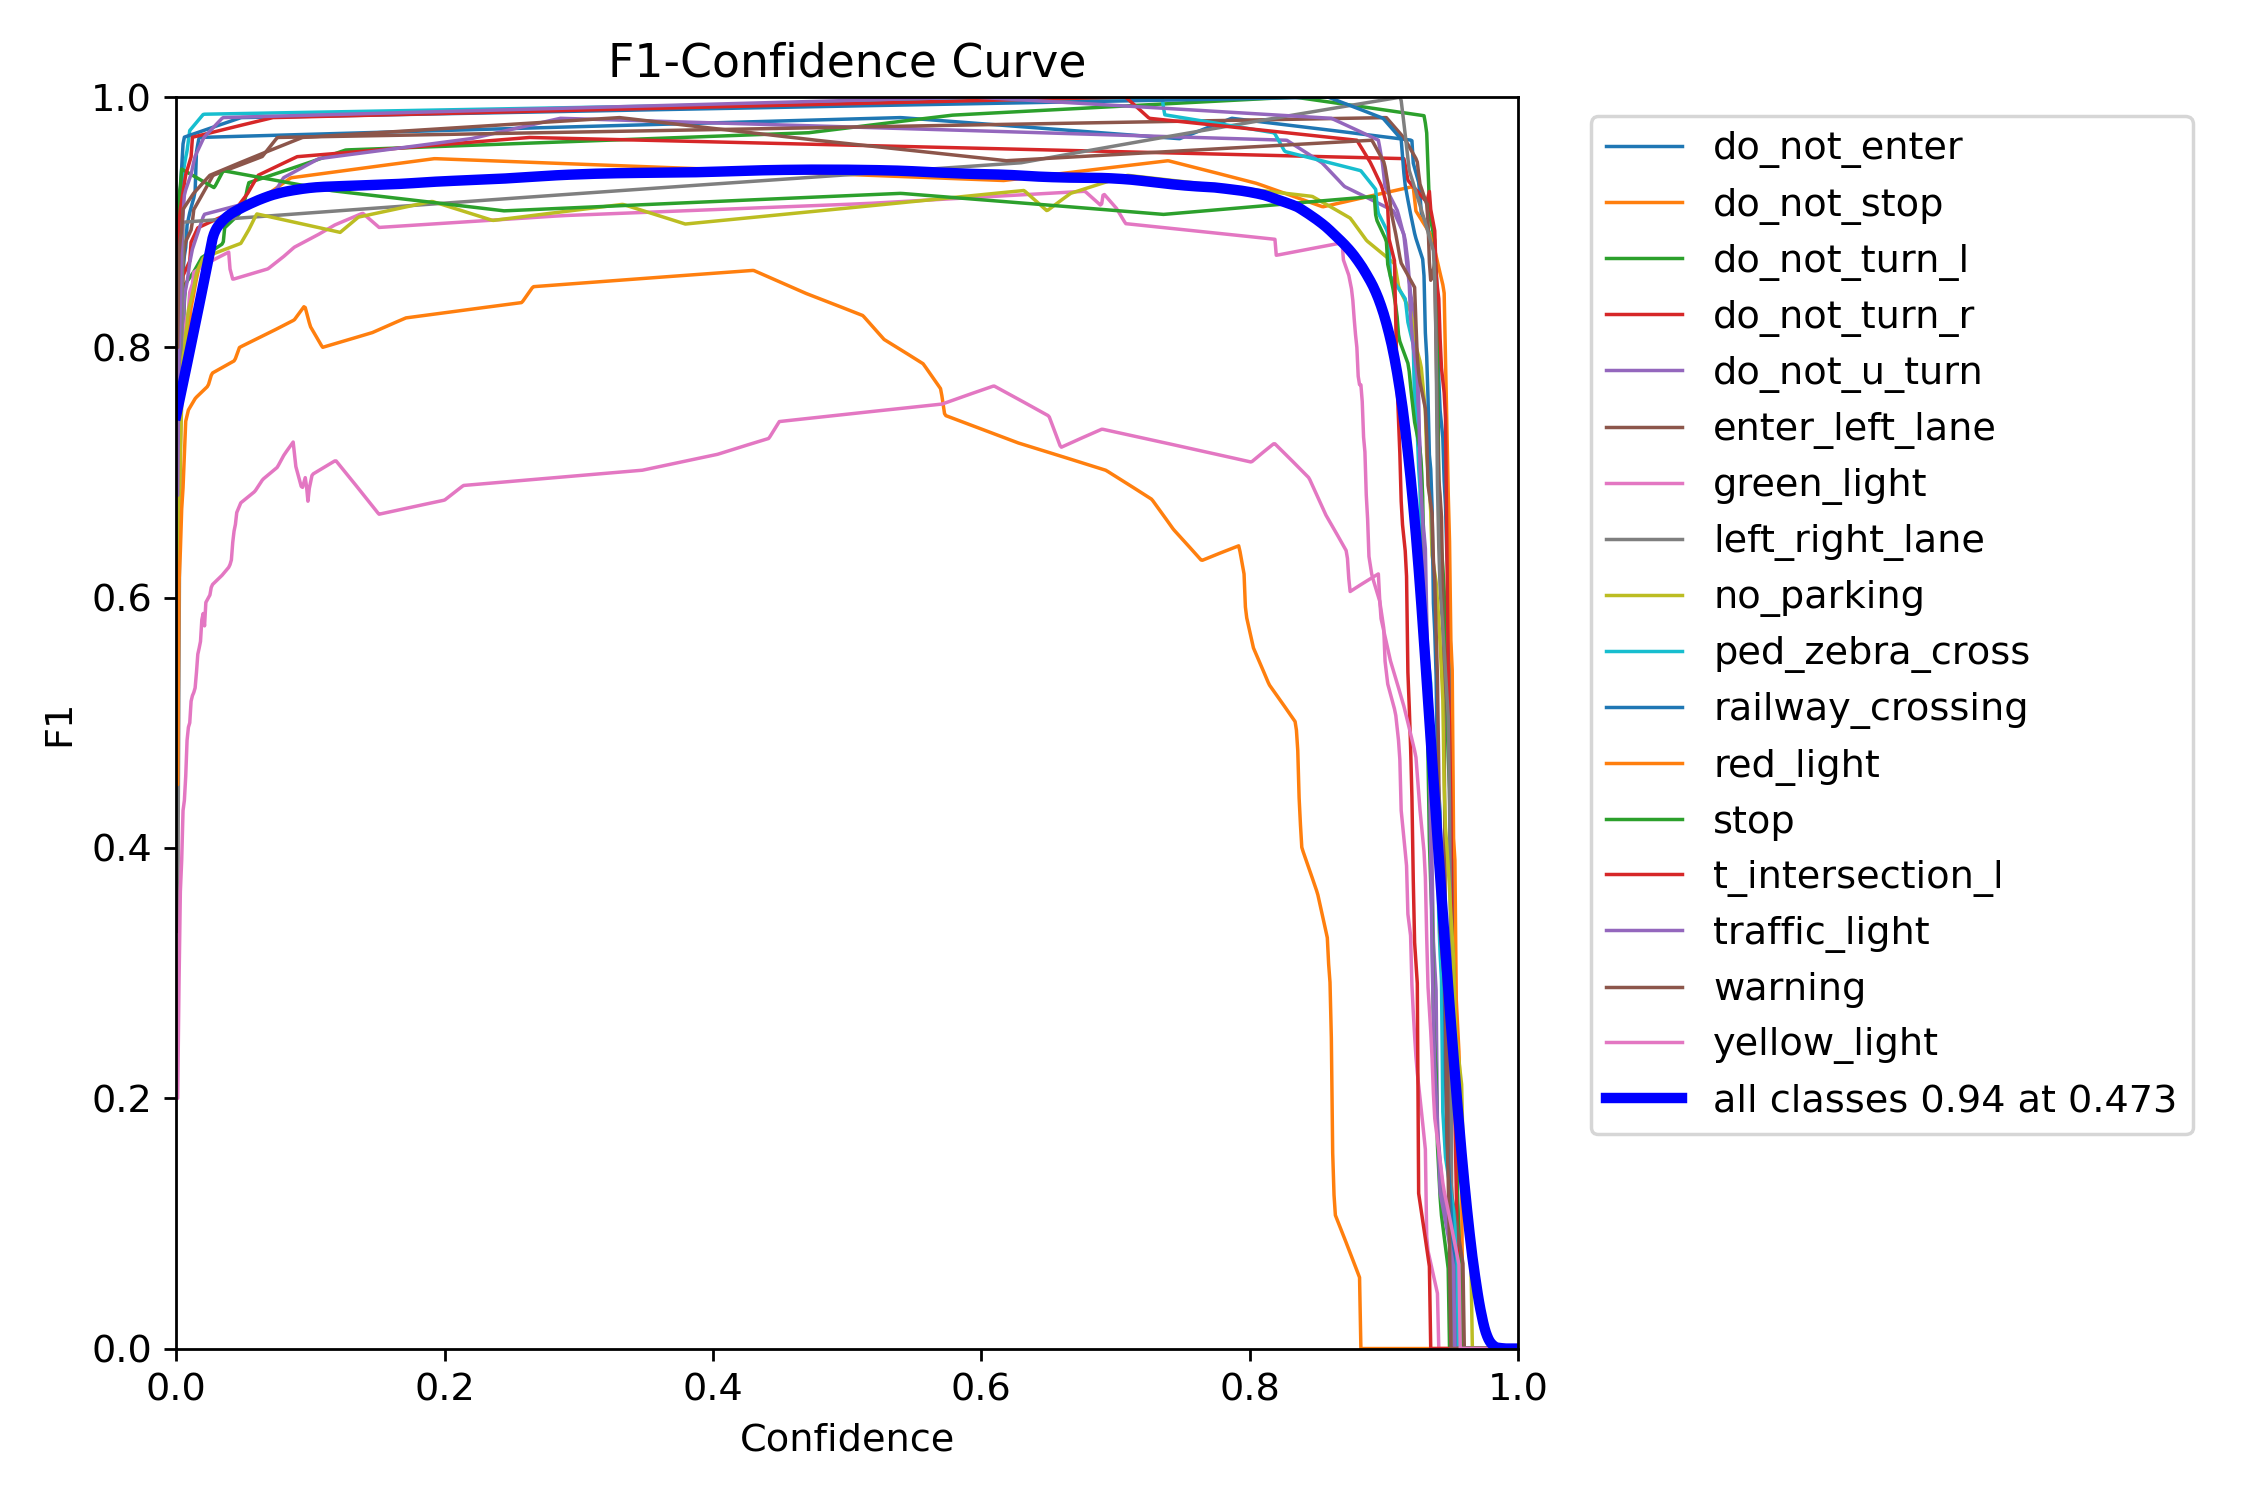

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/F1_curve.png")

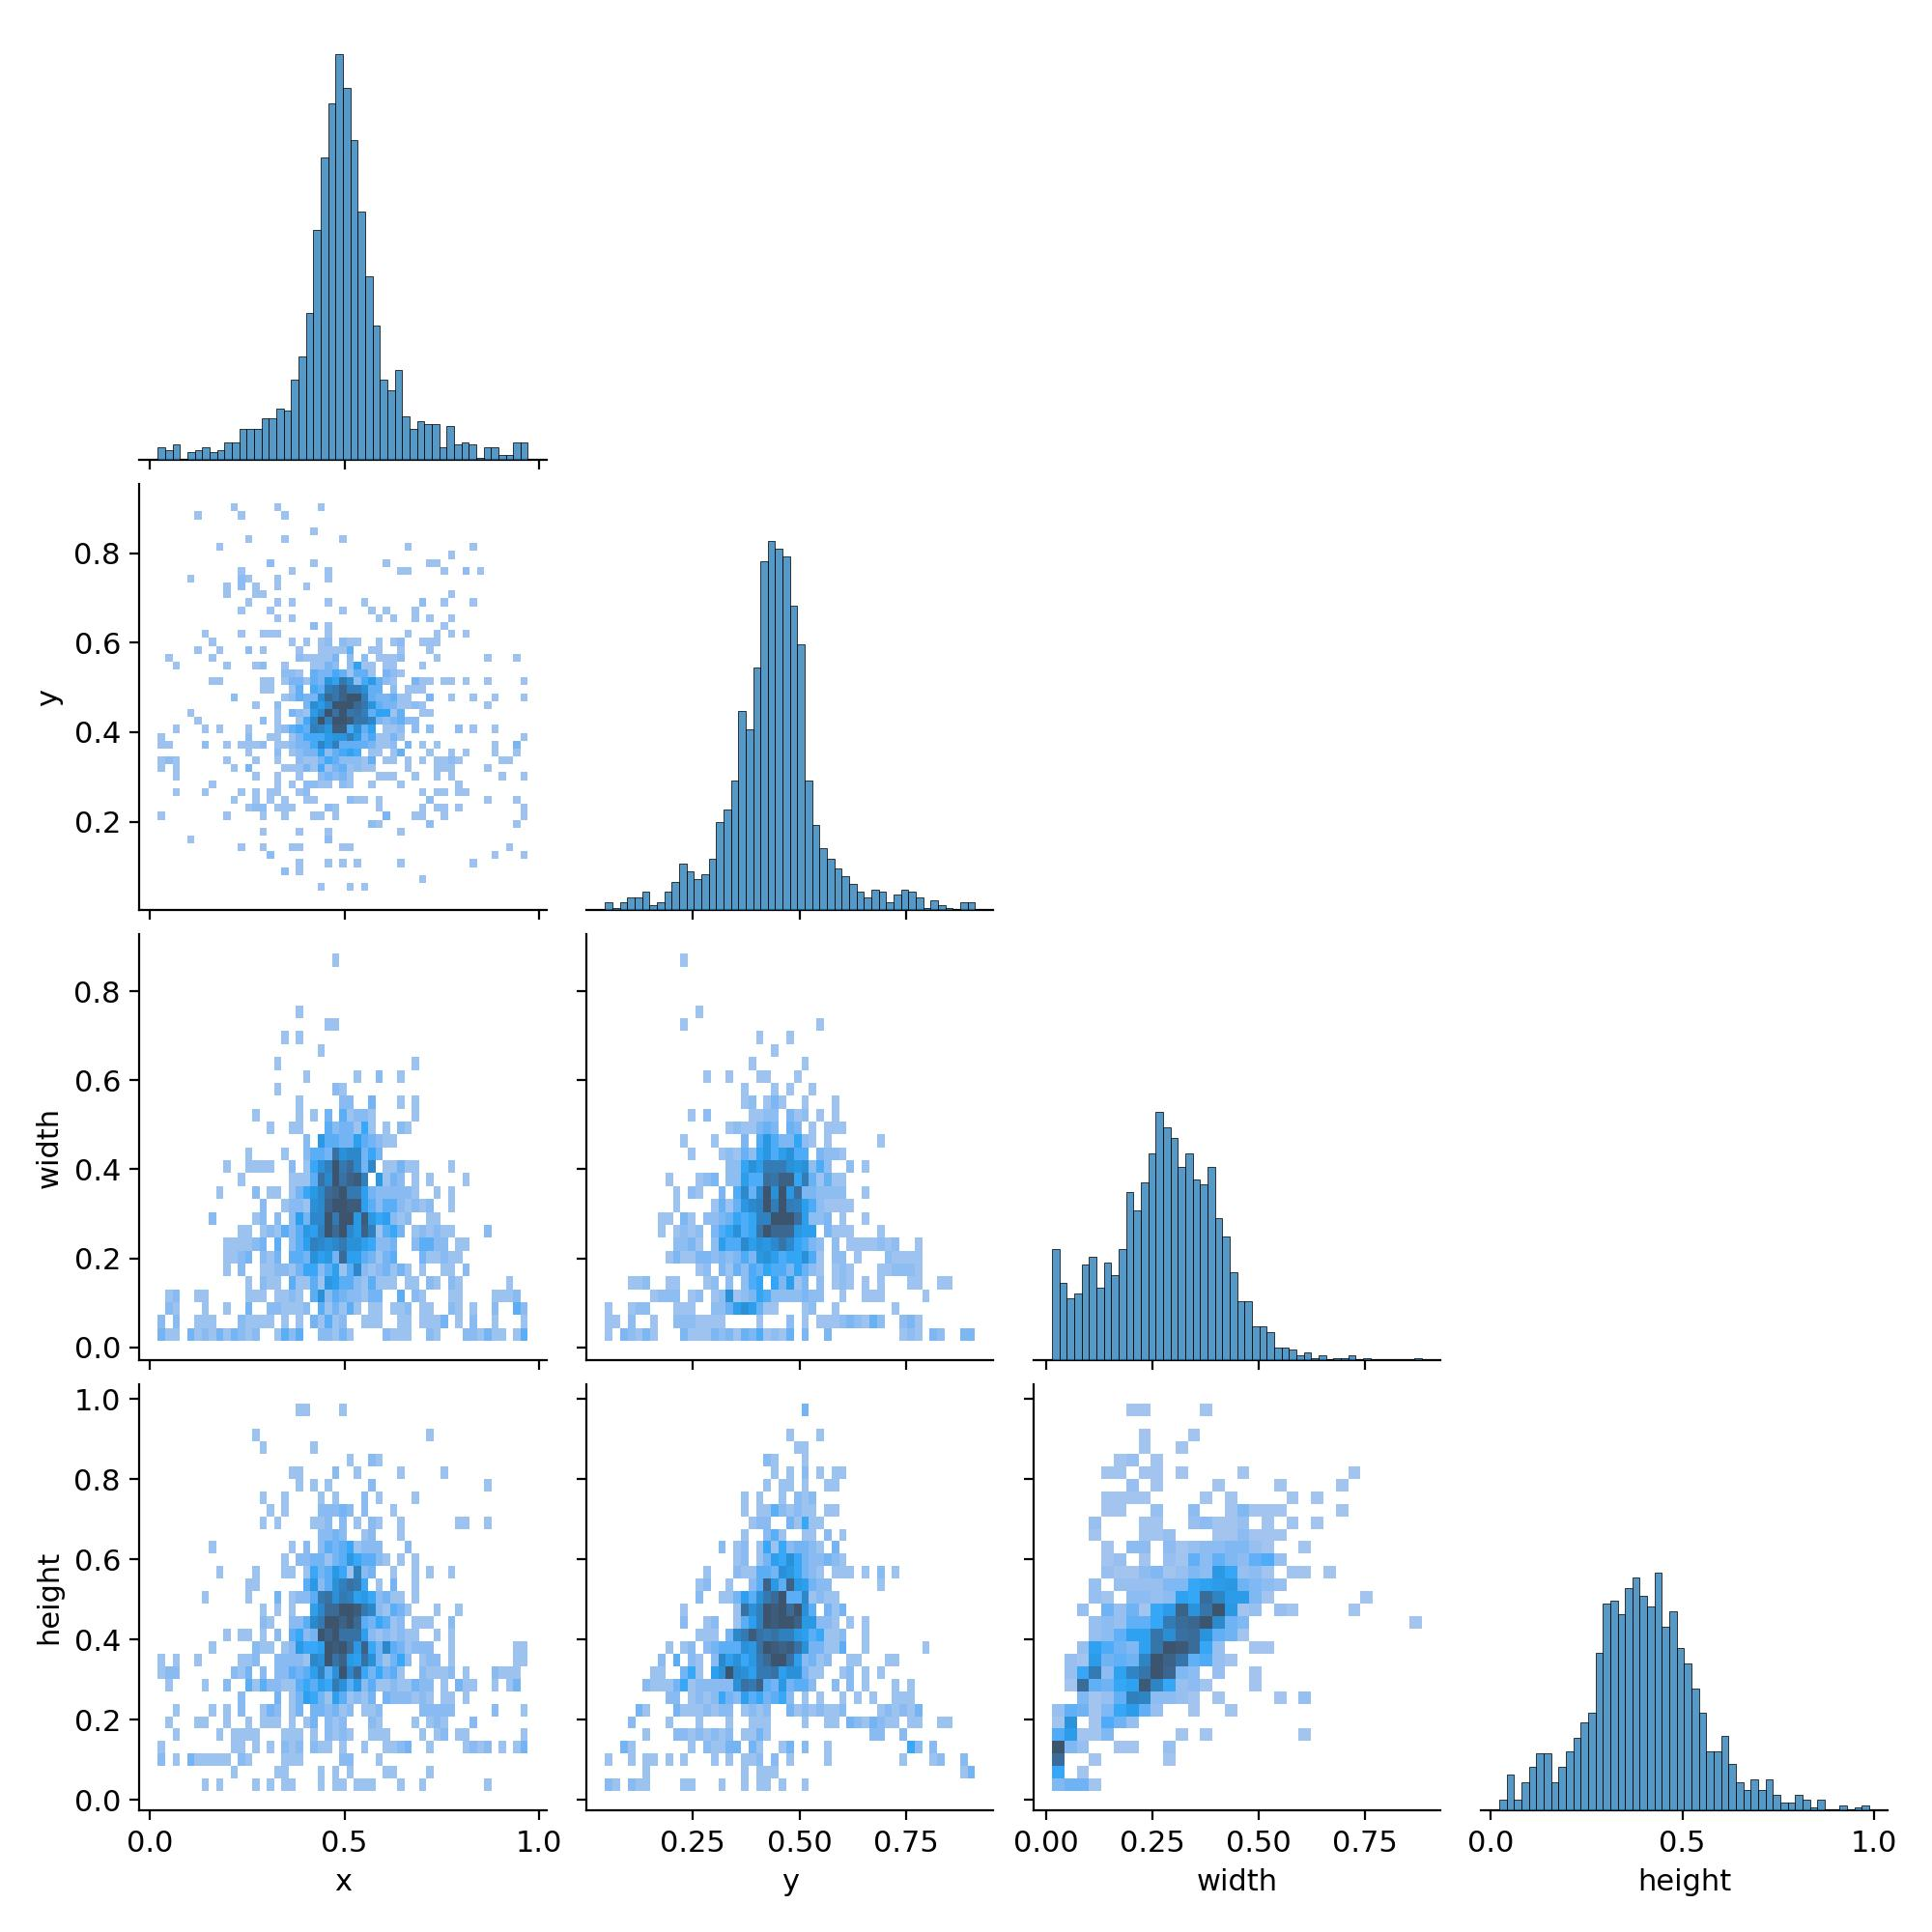

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/labels_correlogram.jpg")

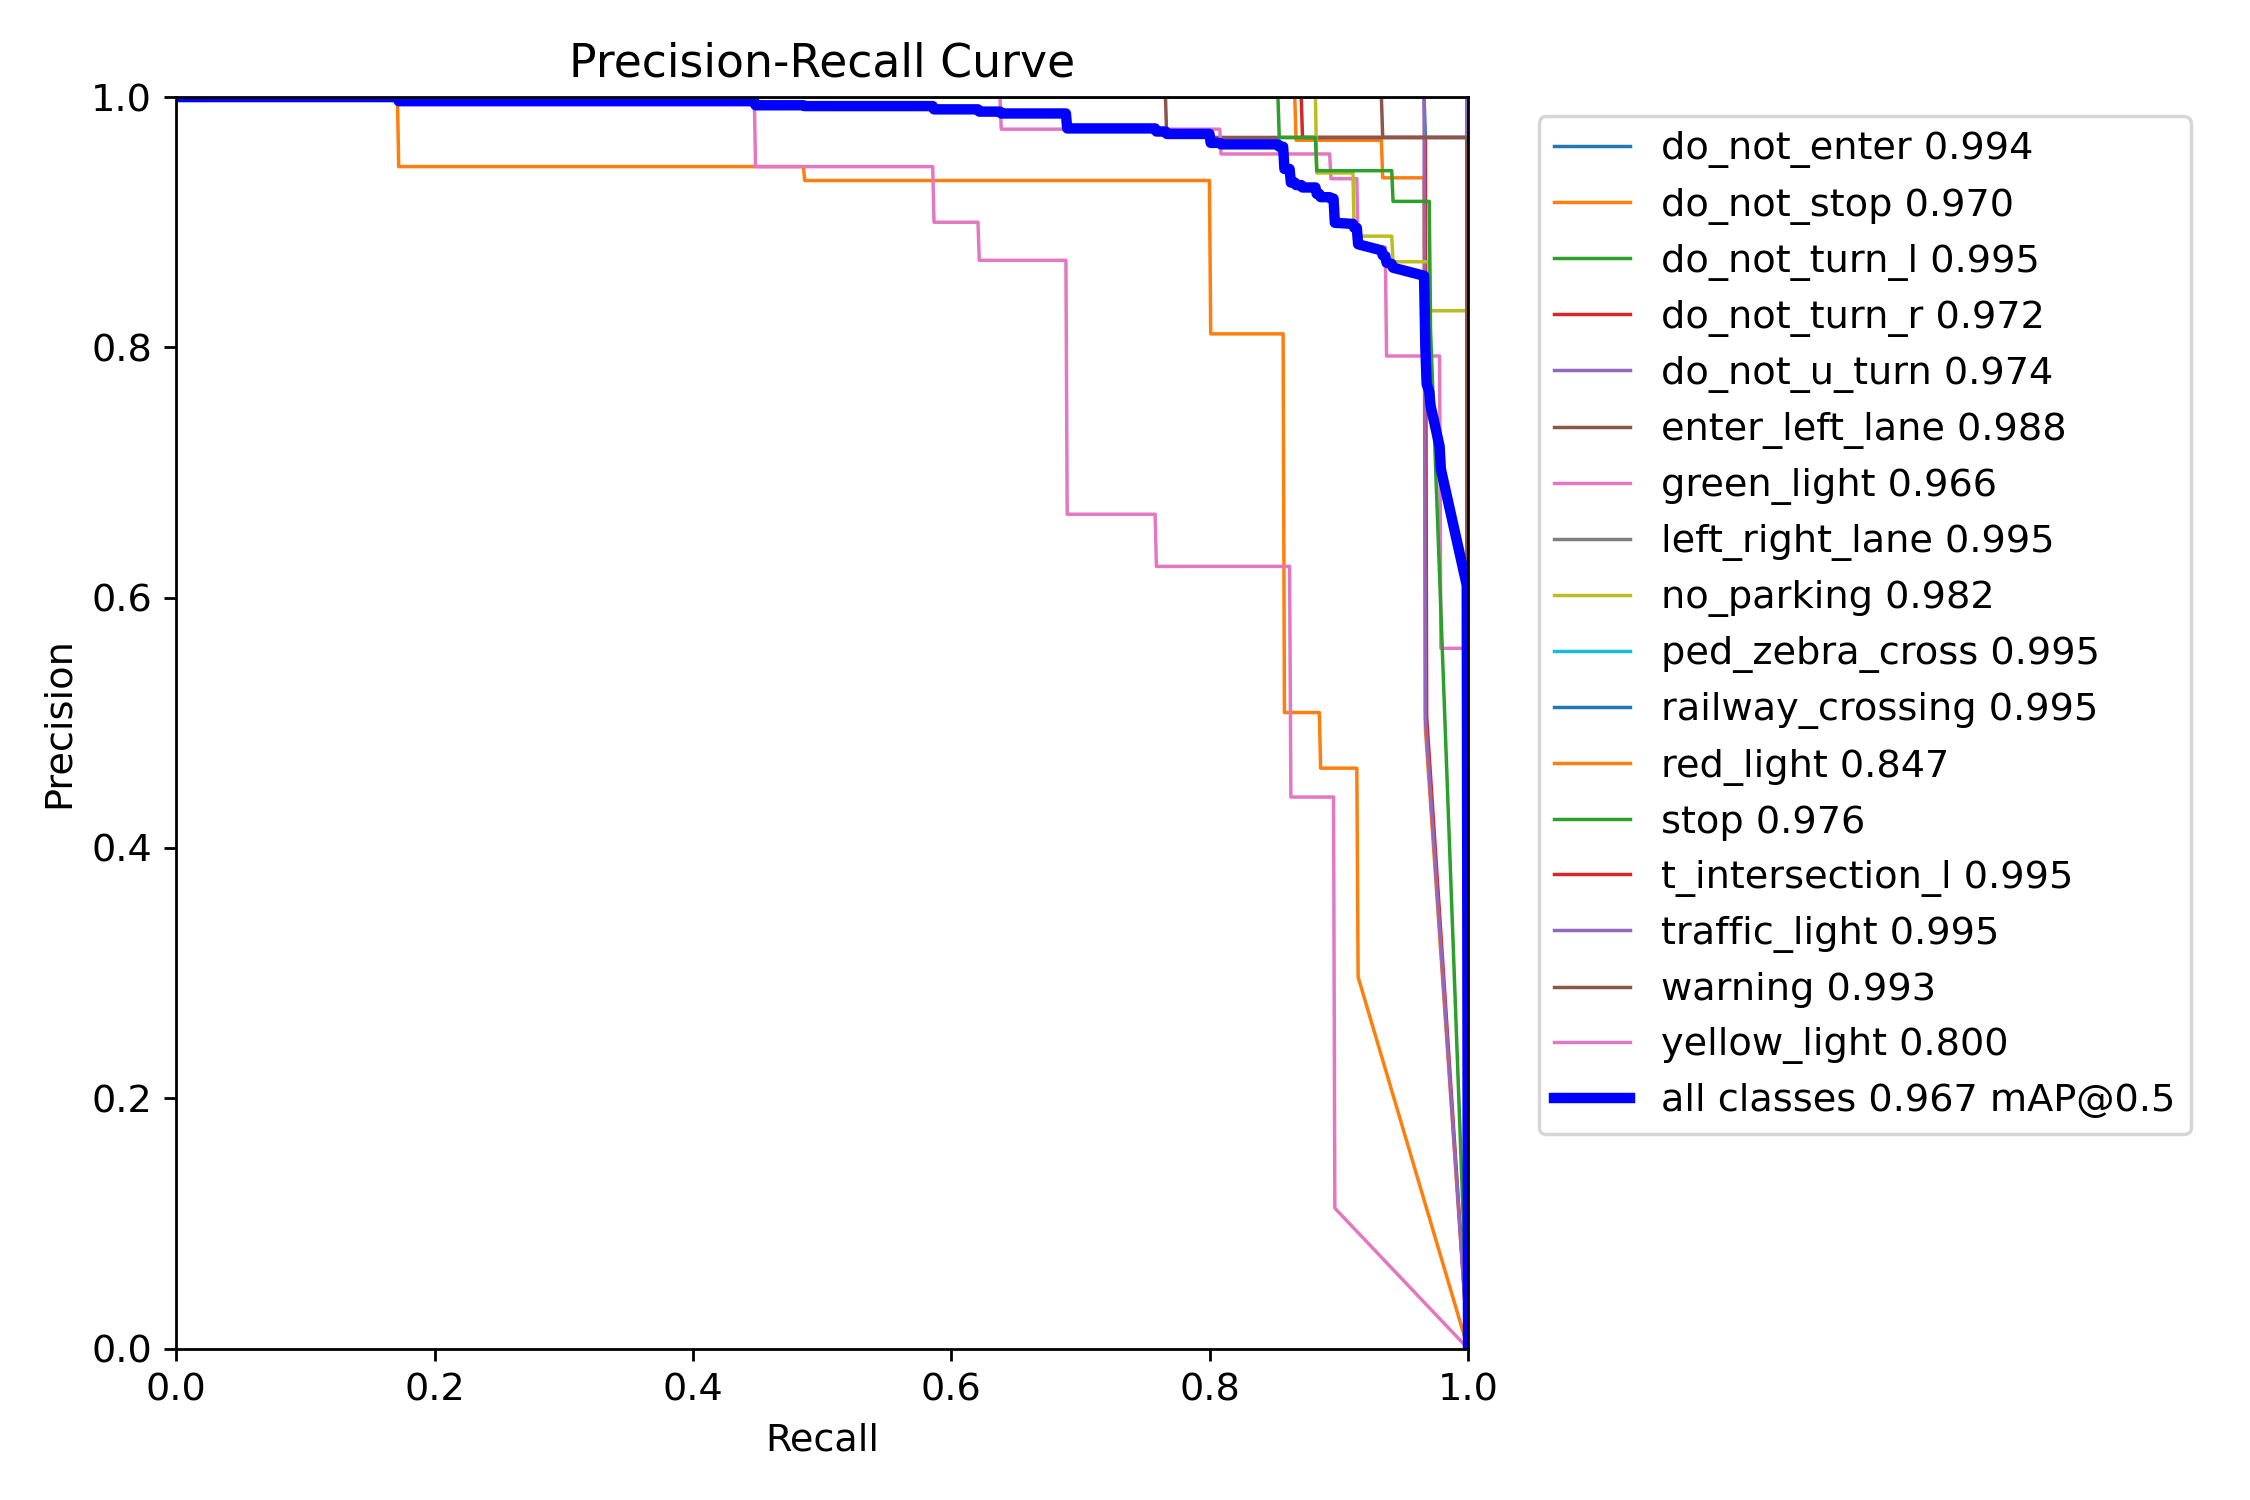

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/PR_curve.png")

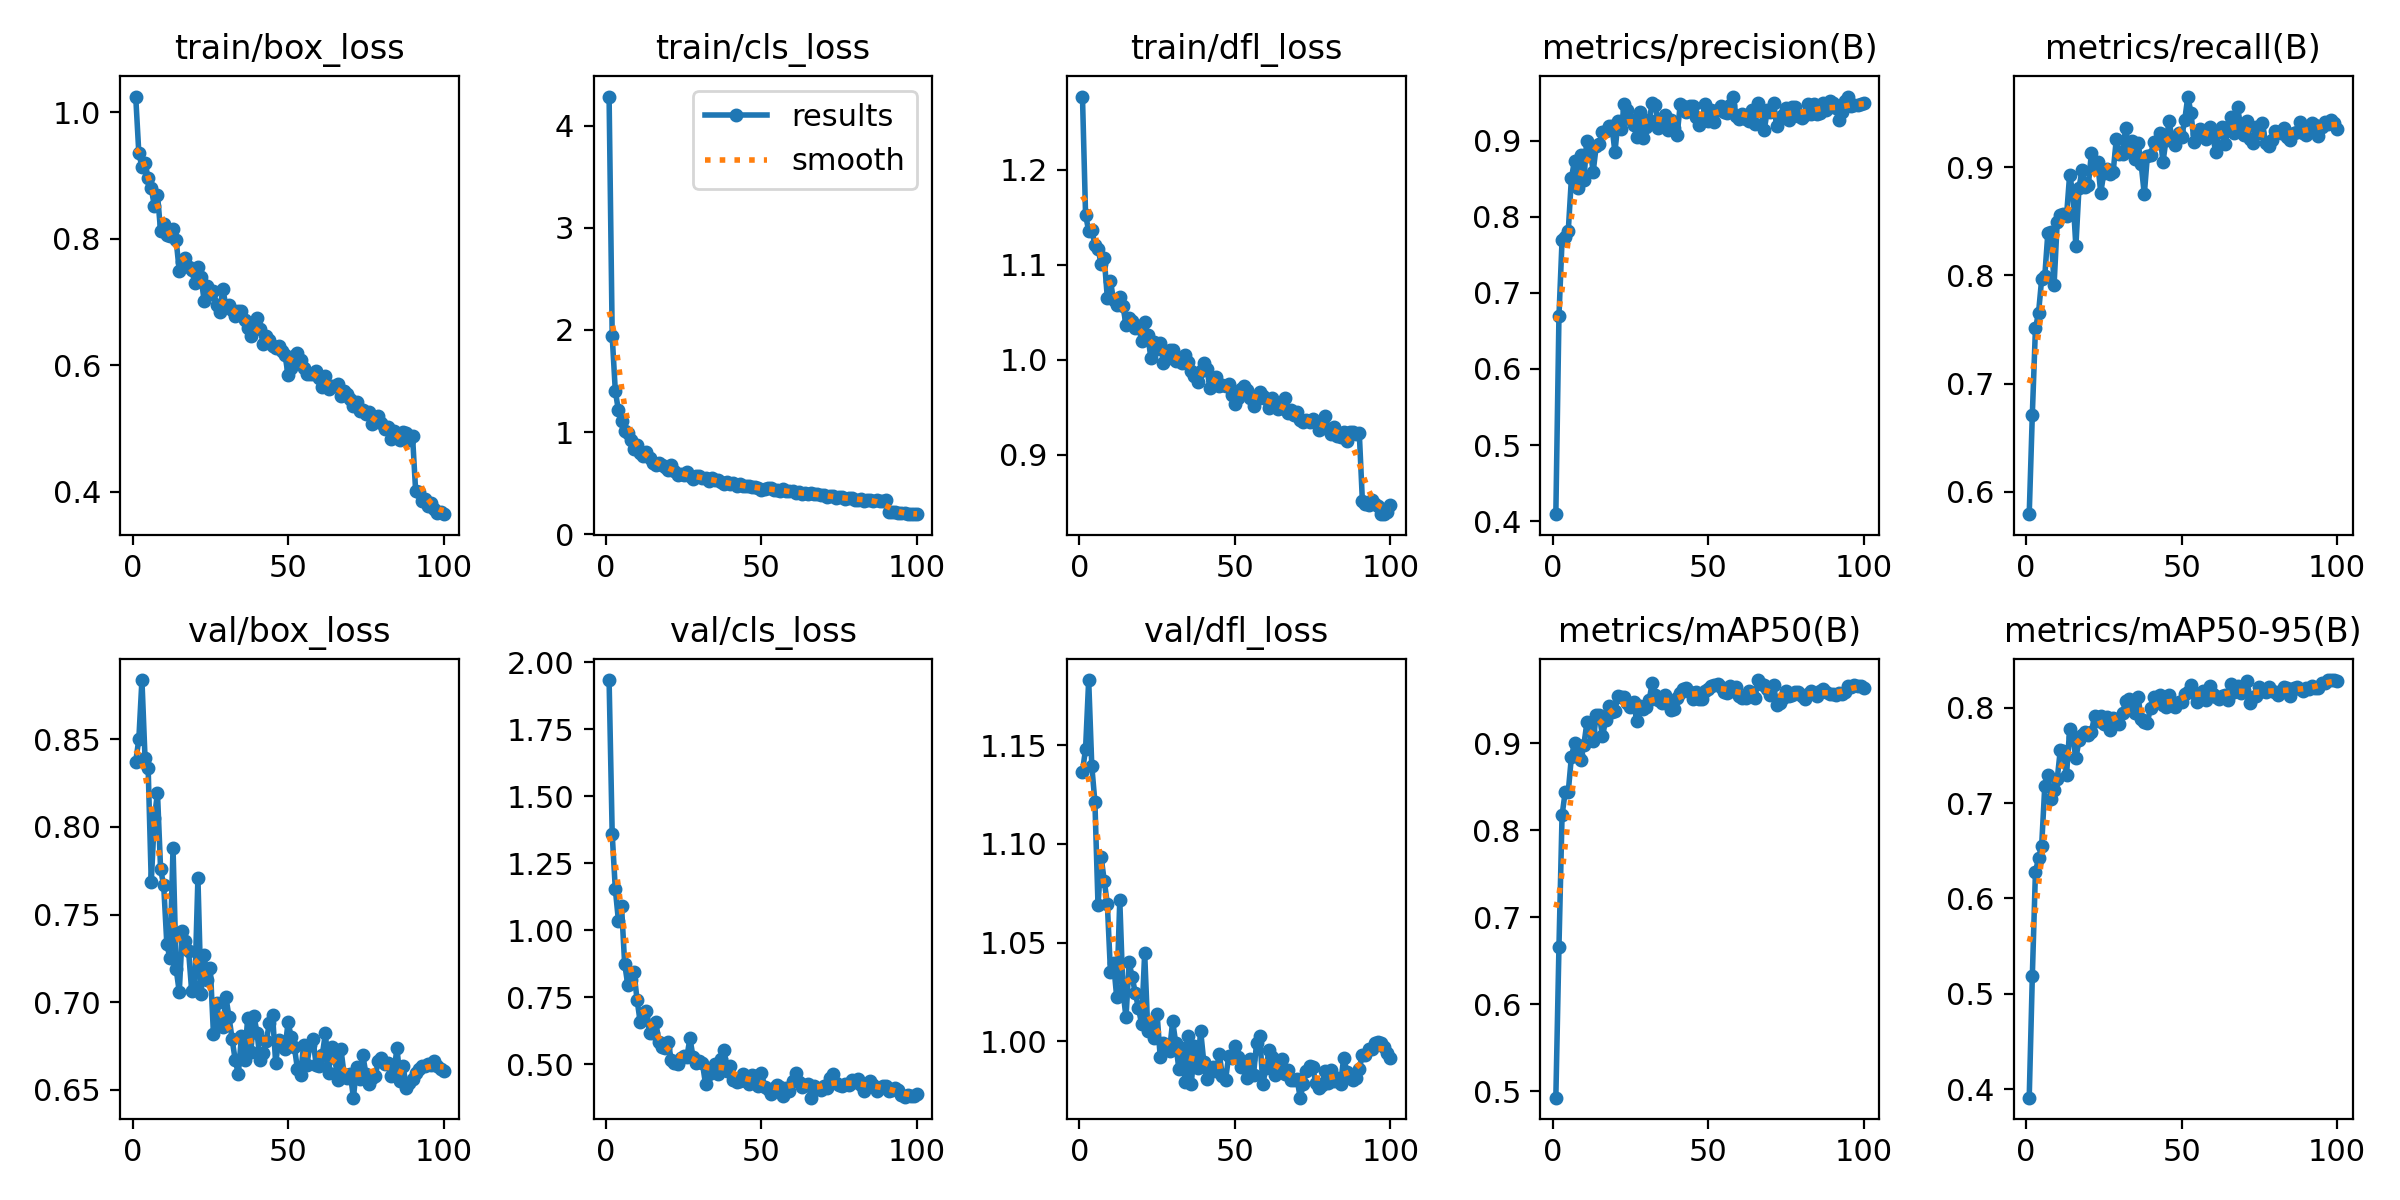

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/results.png")

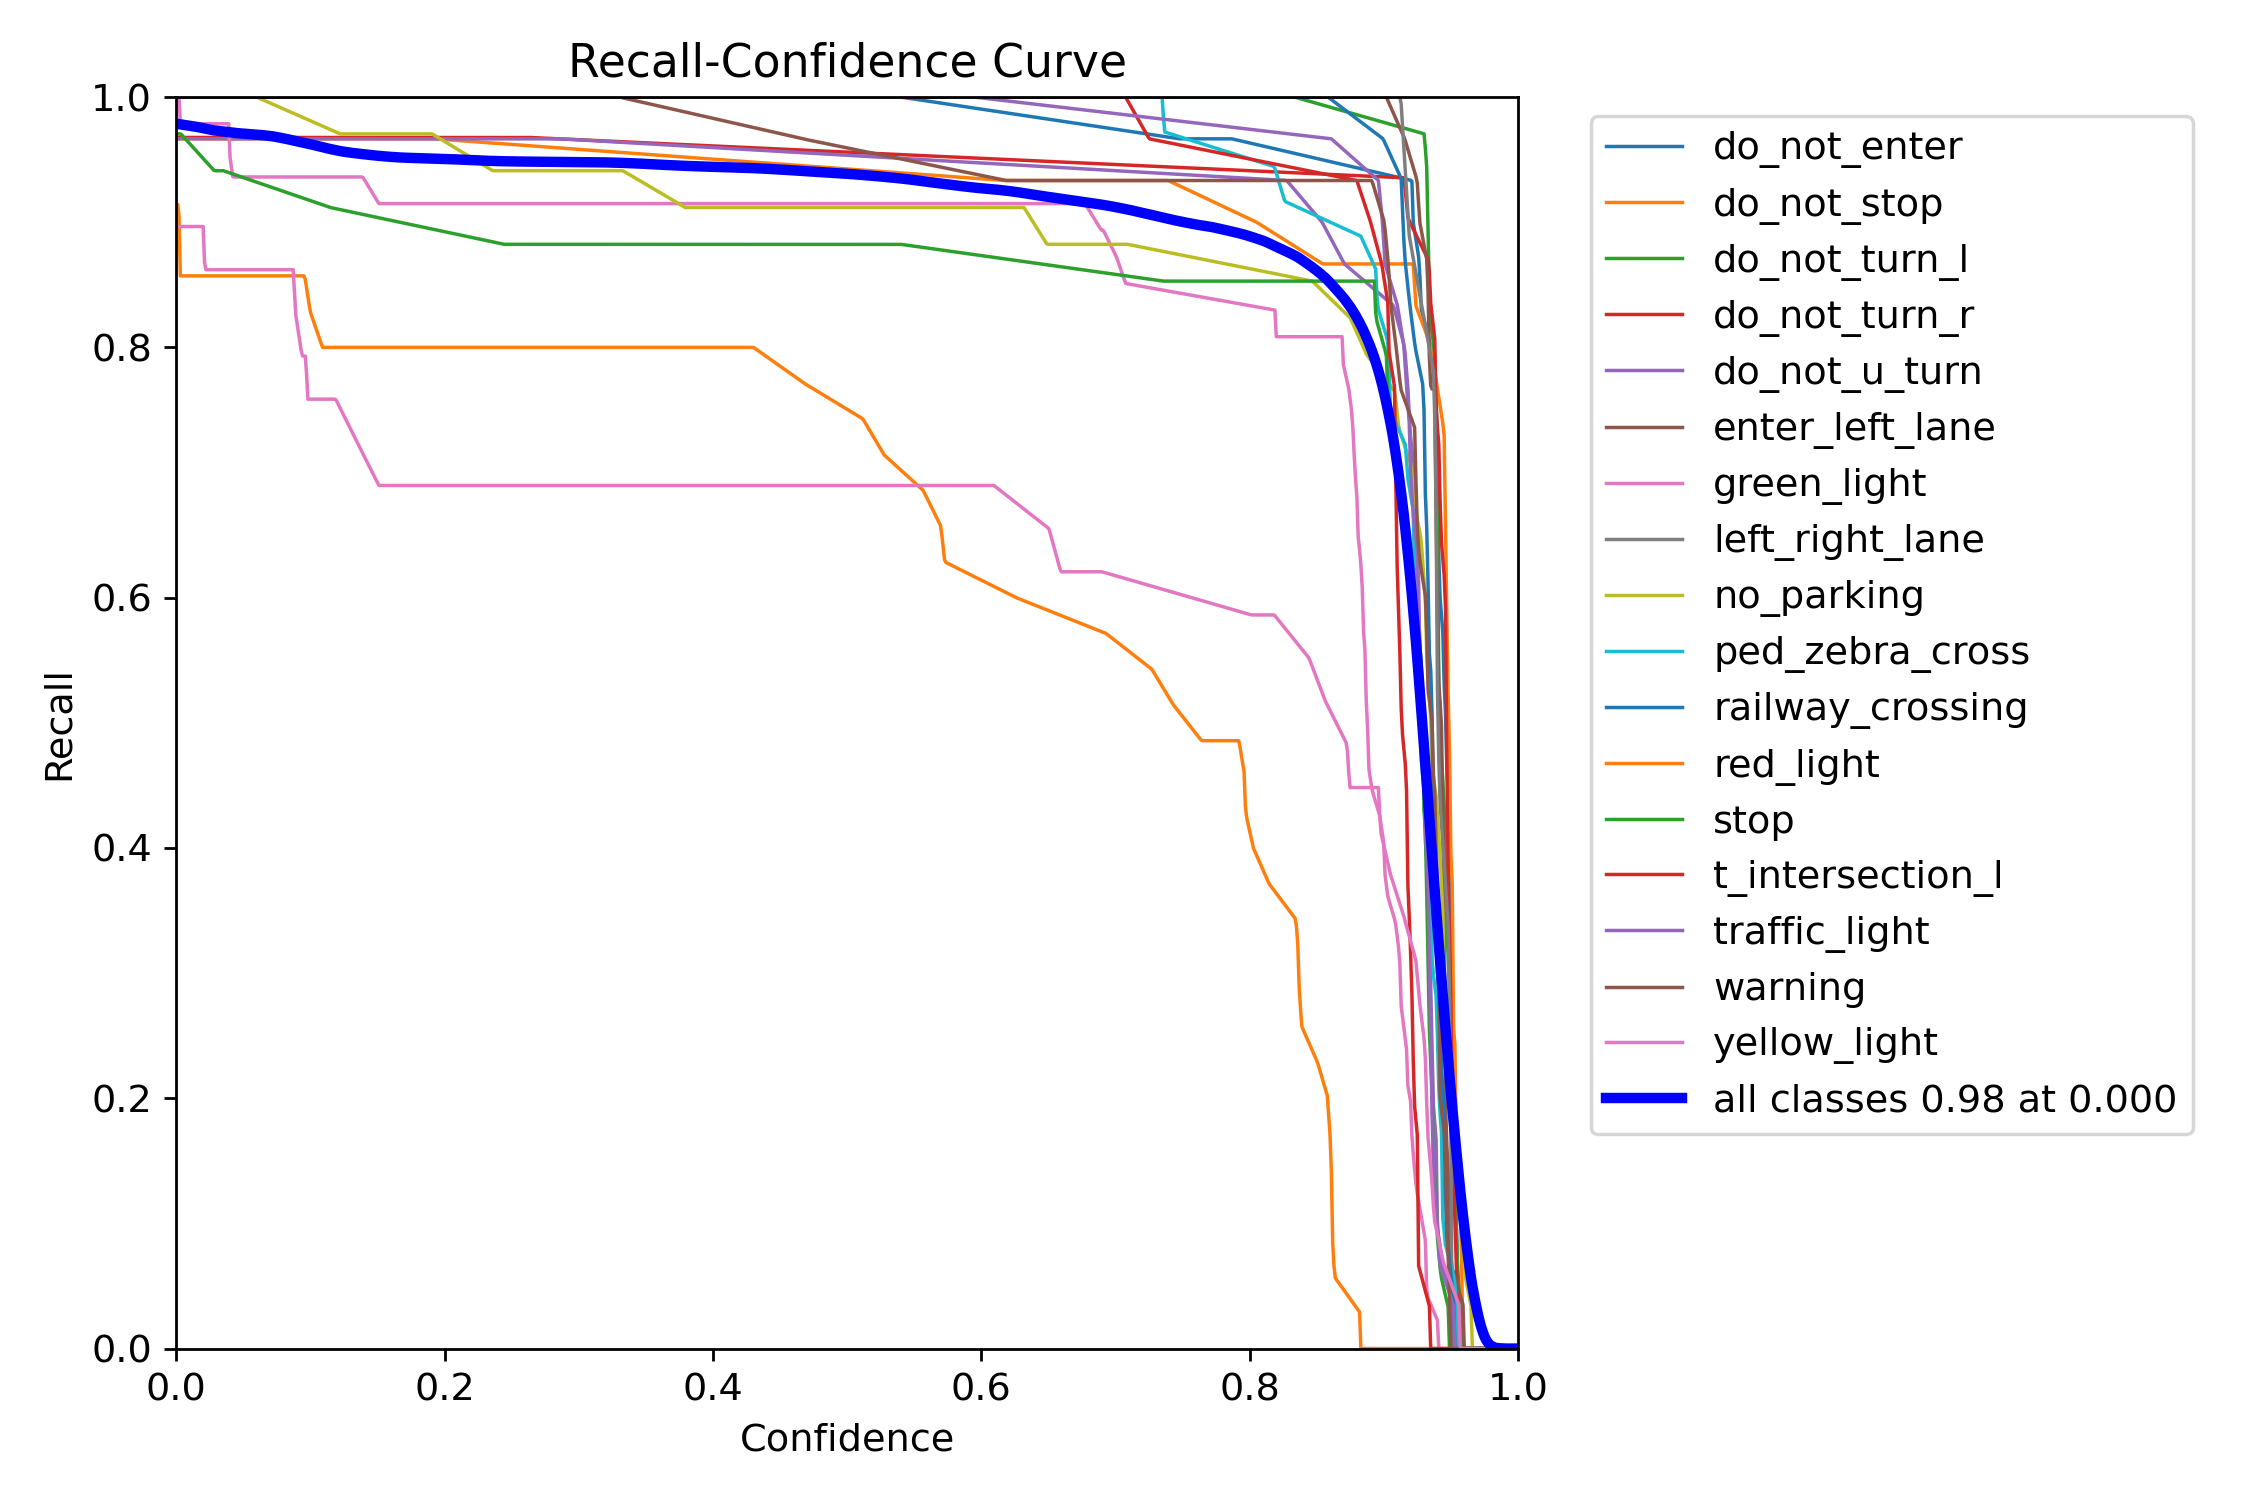

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/R_curve.png")

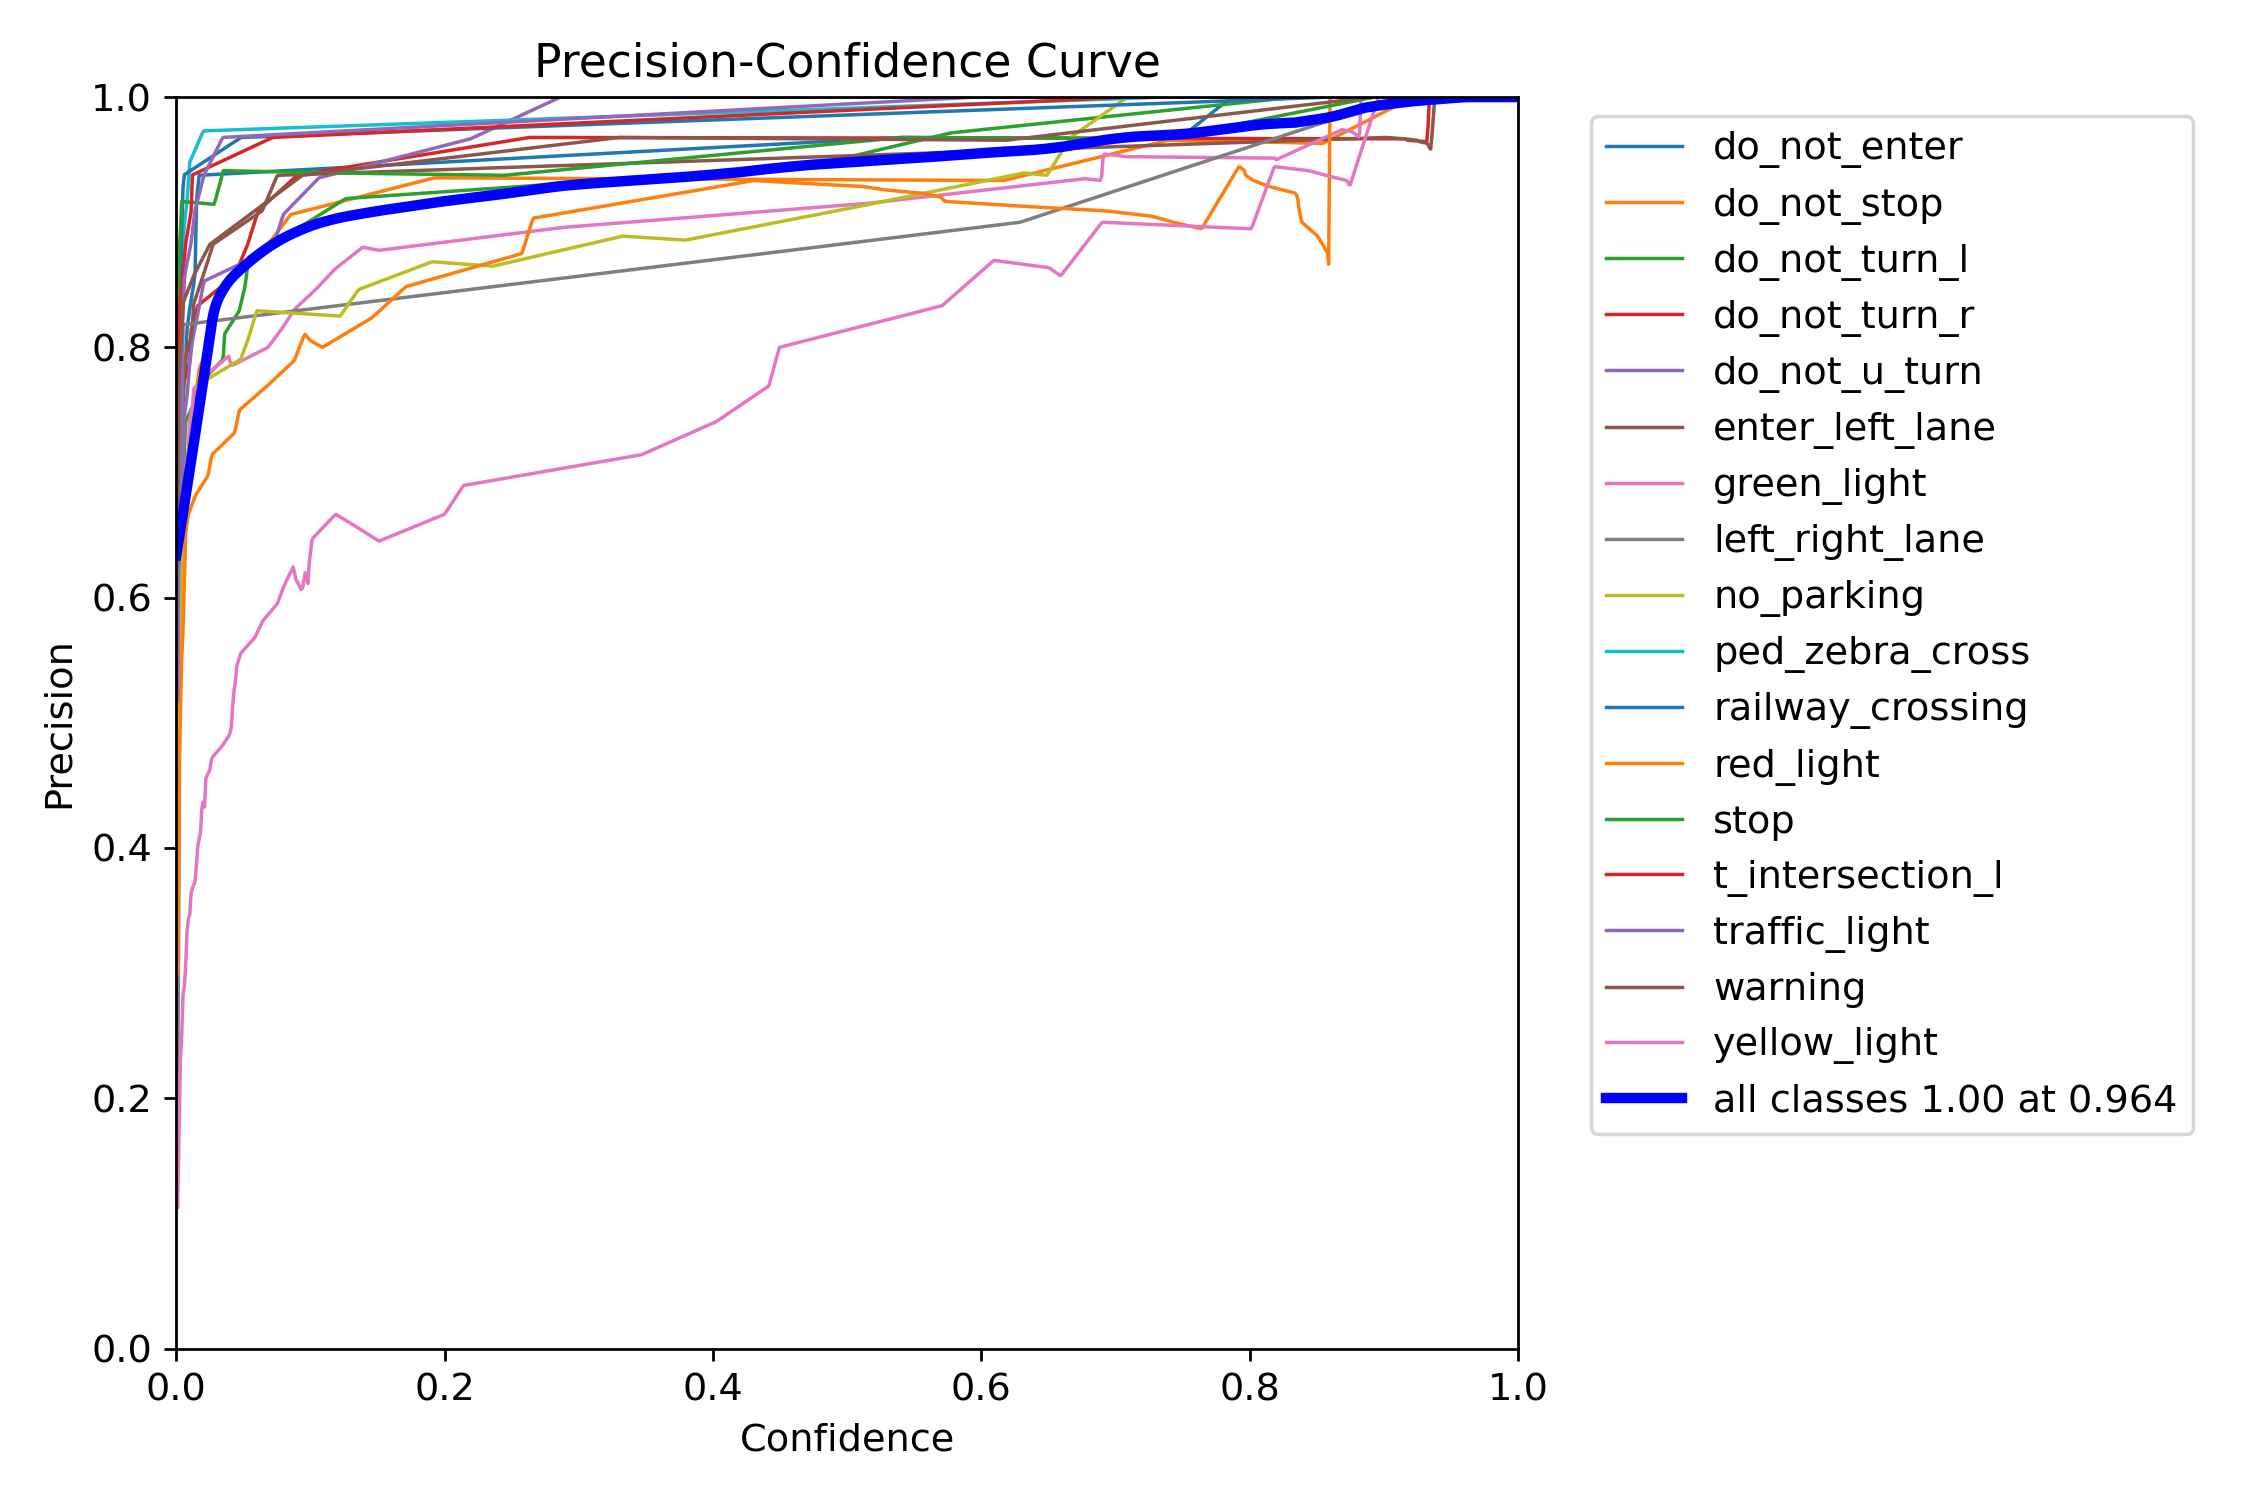

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/P_curve.png")

# Checking the Model Prediction on Validation Batch

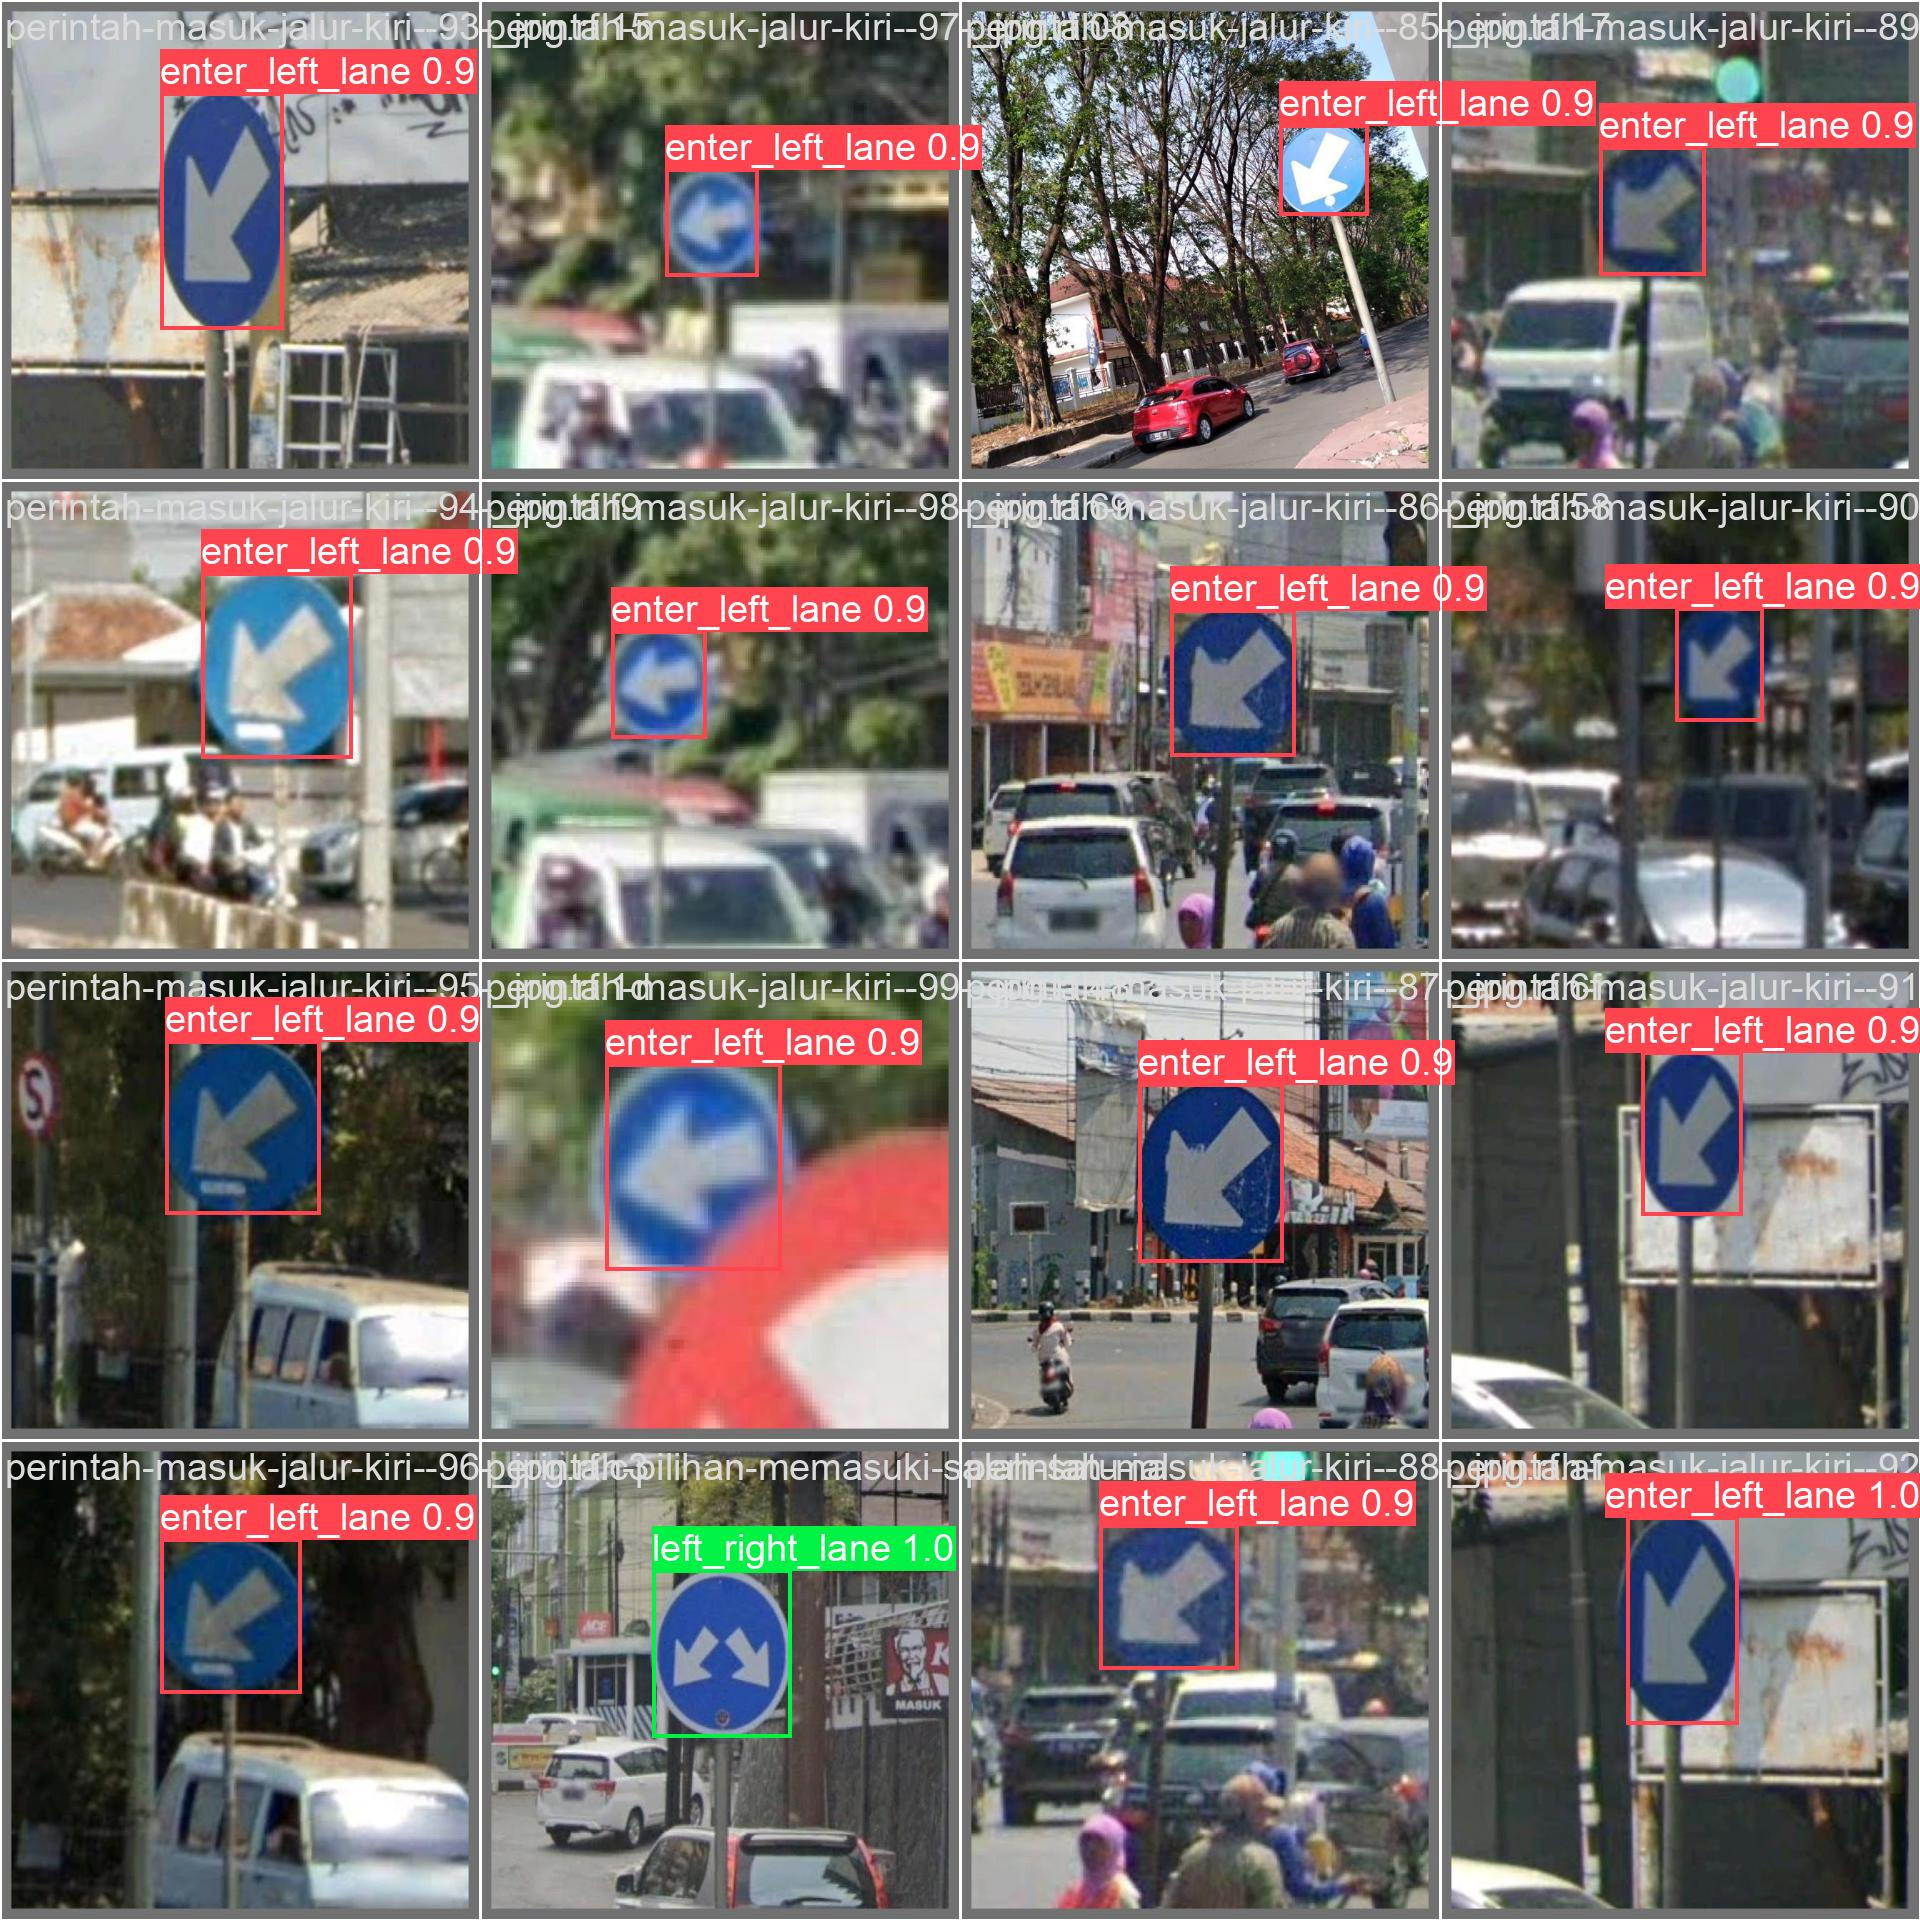

In [ ]:
Image(filename = f"{HOME}/runs/detect/train/val_batch0_pred.jpg")

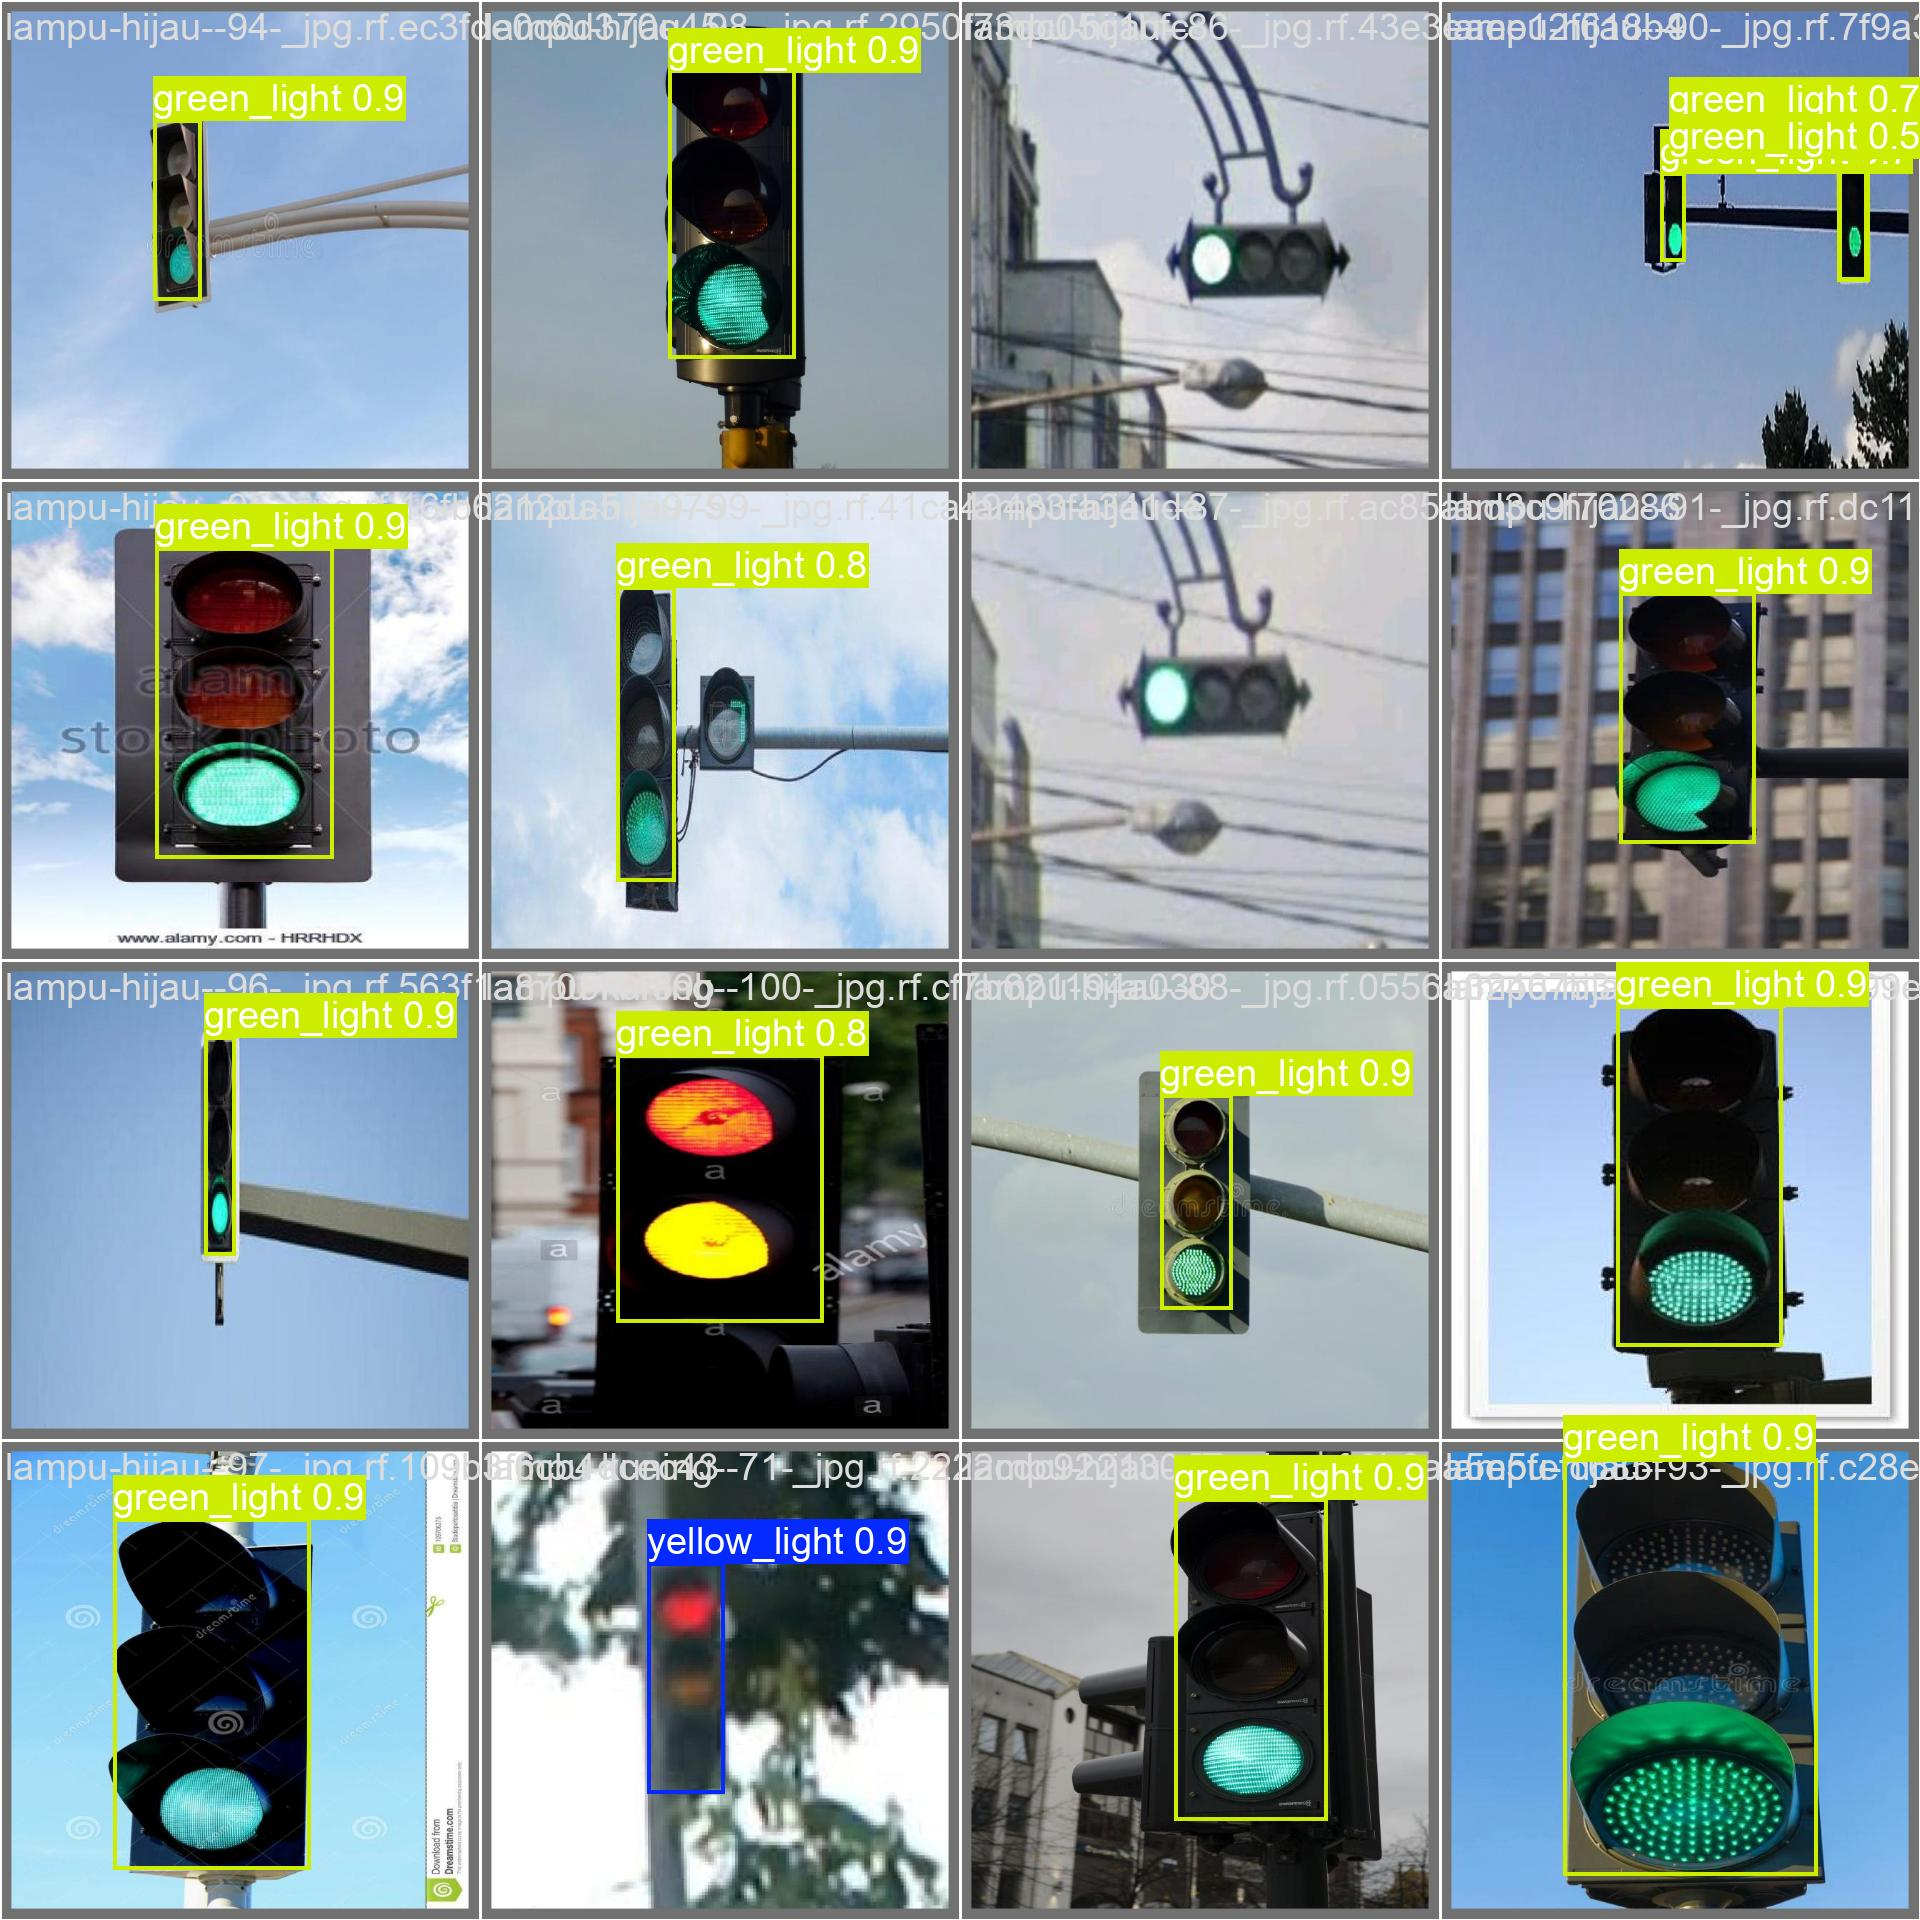

In [ ]:
Image(filename = f"{HOME}/runs/detect/train/val_batch1_pred.jpg")

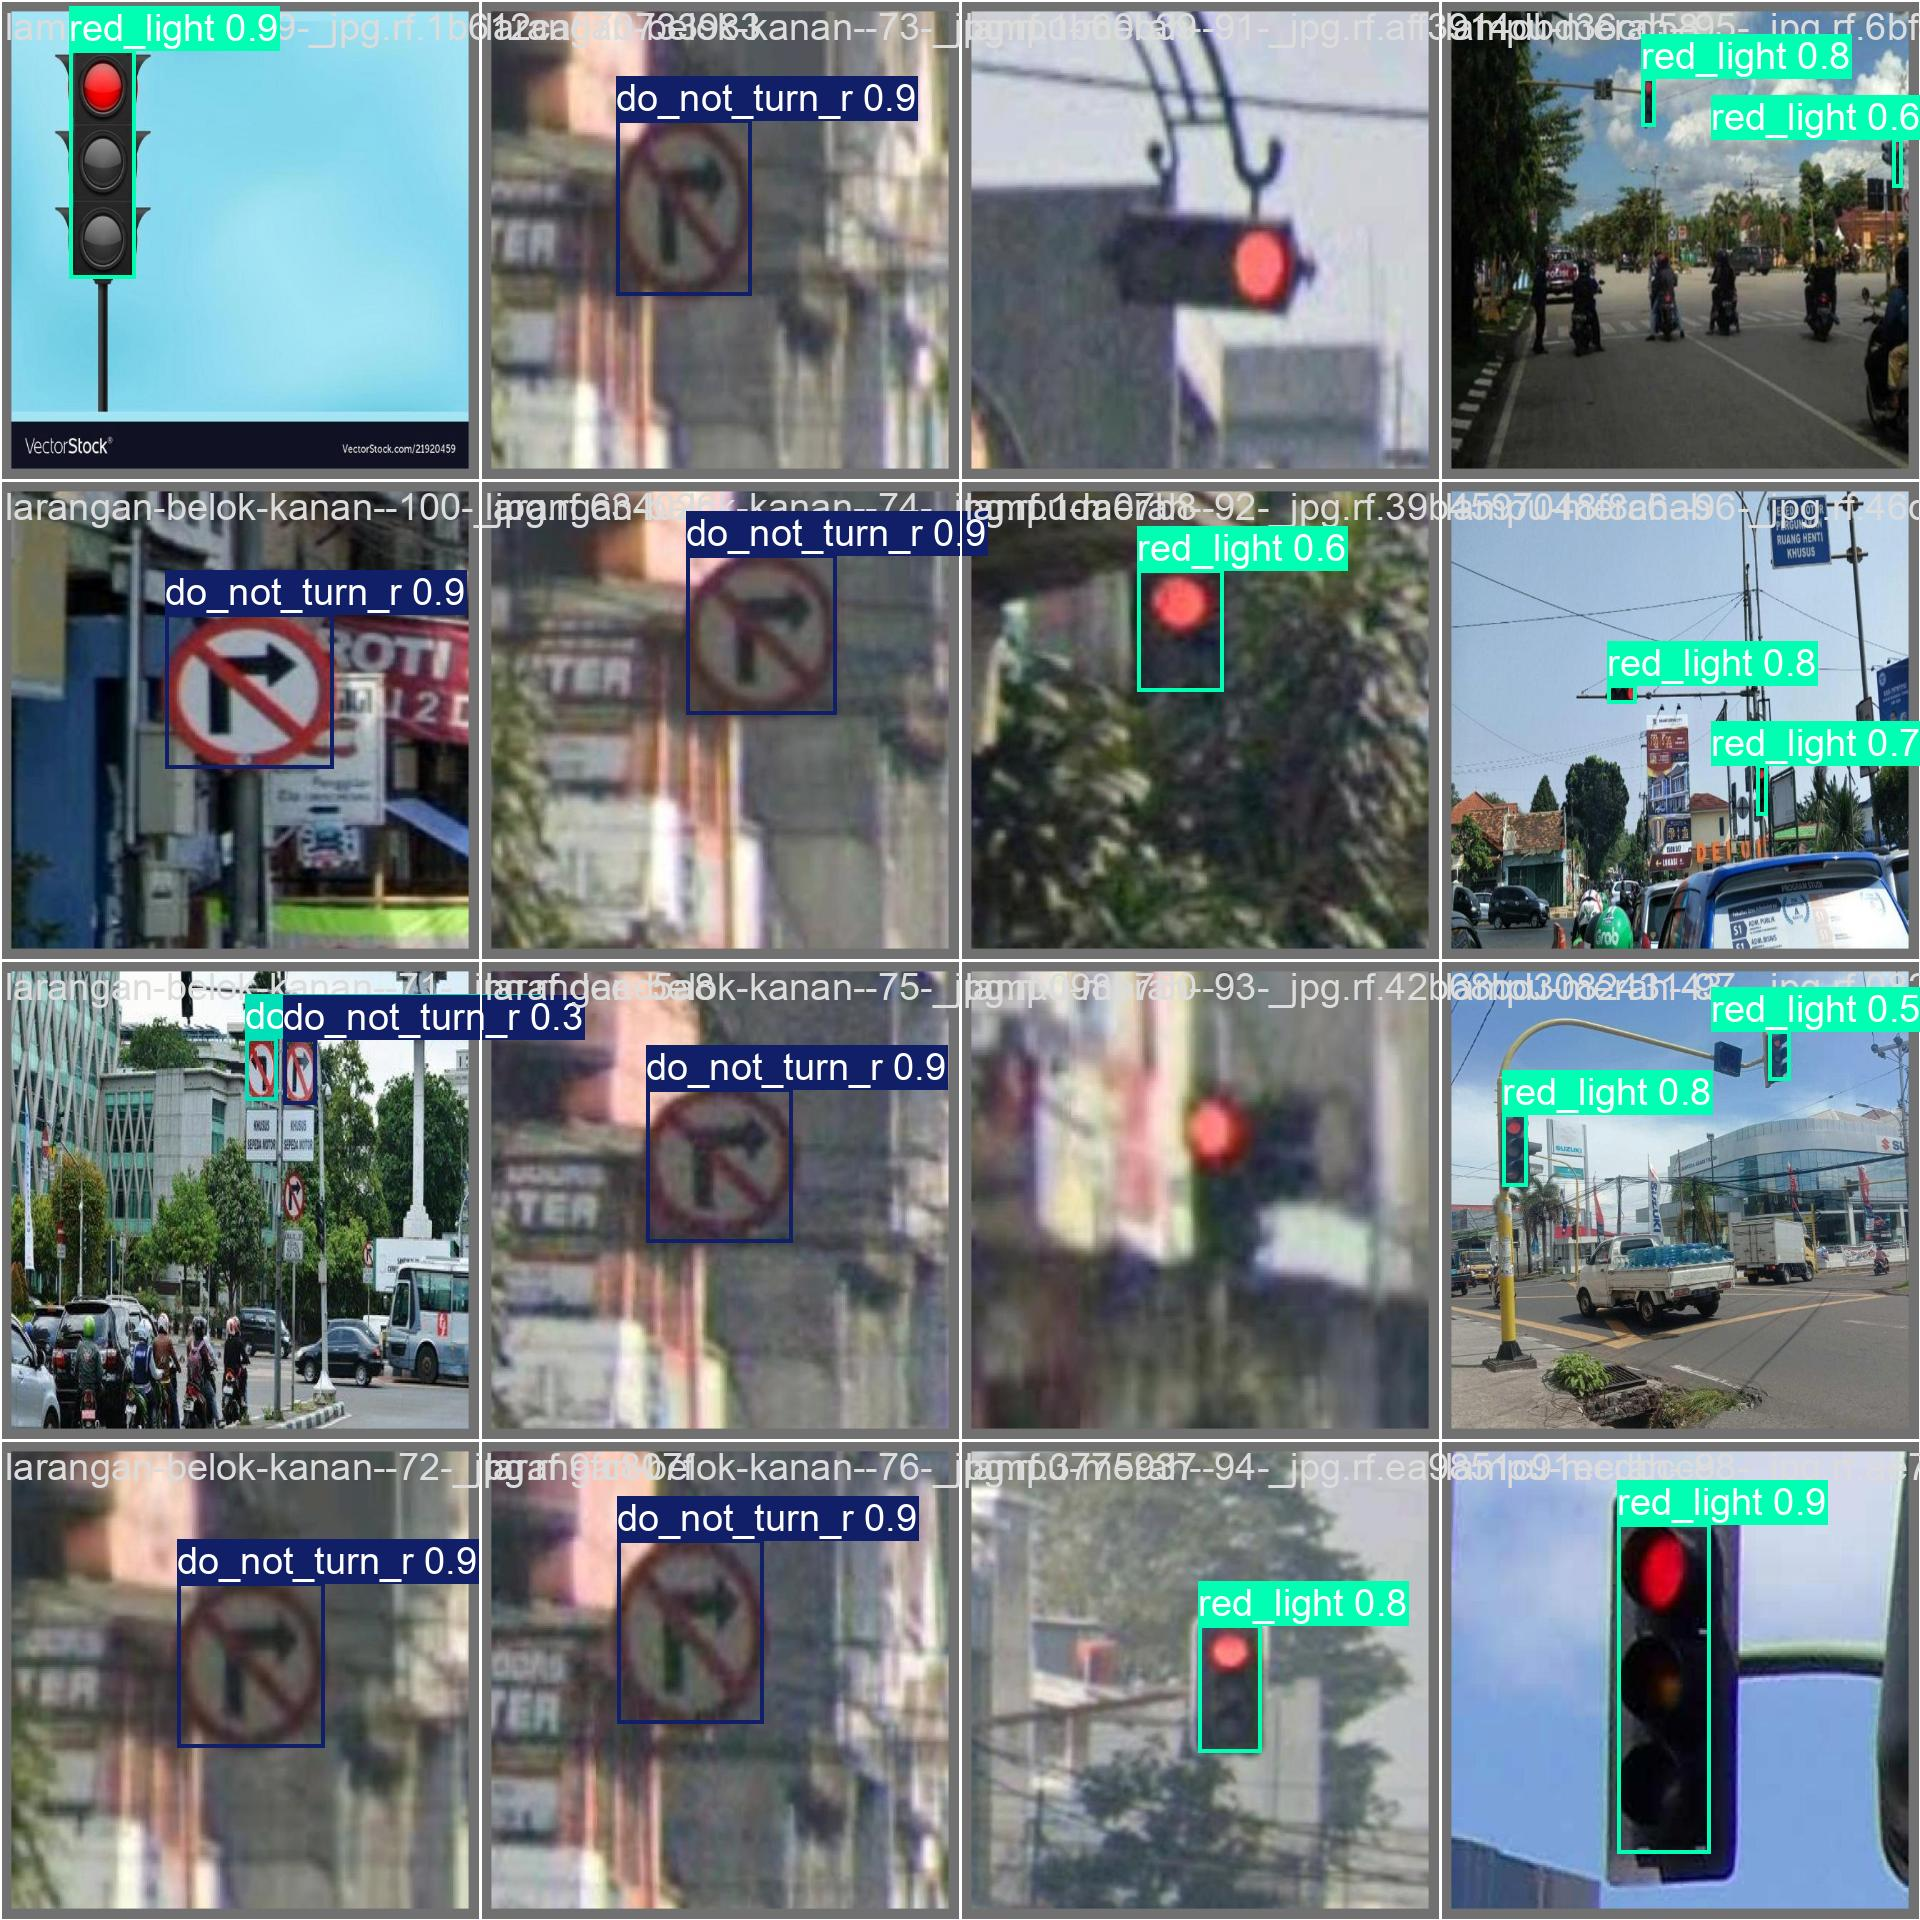

In [ ]:
Image(filename = f"{HOME}/runs/detect/train/val_batch2_pred.jpg")

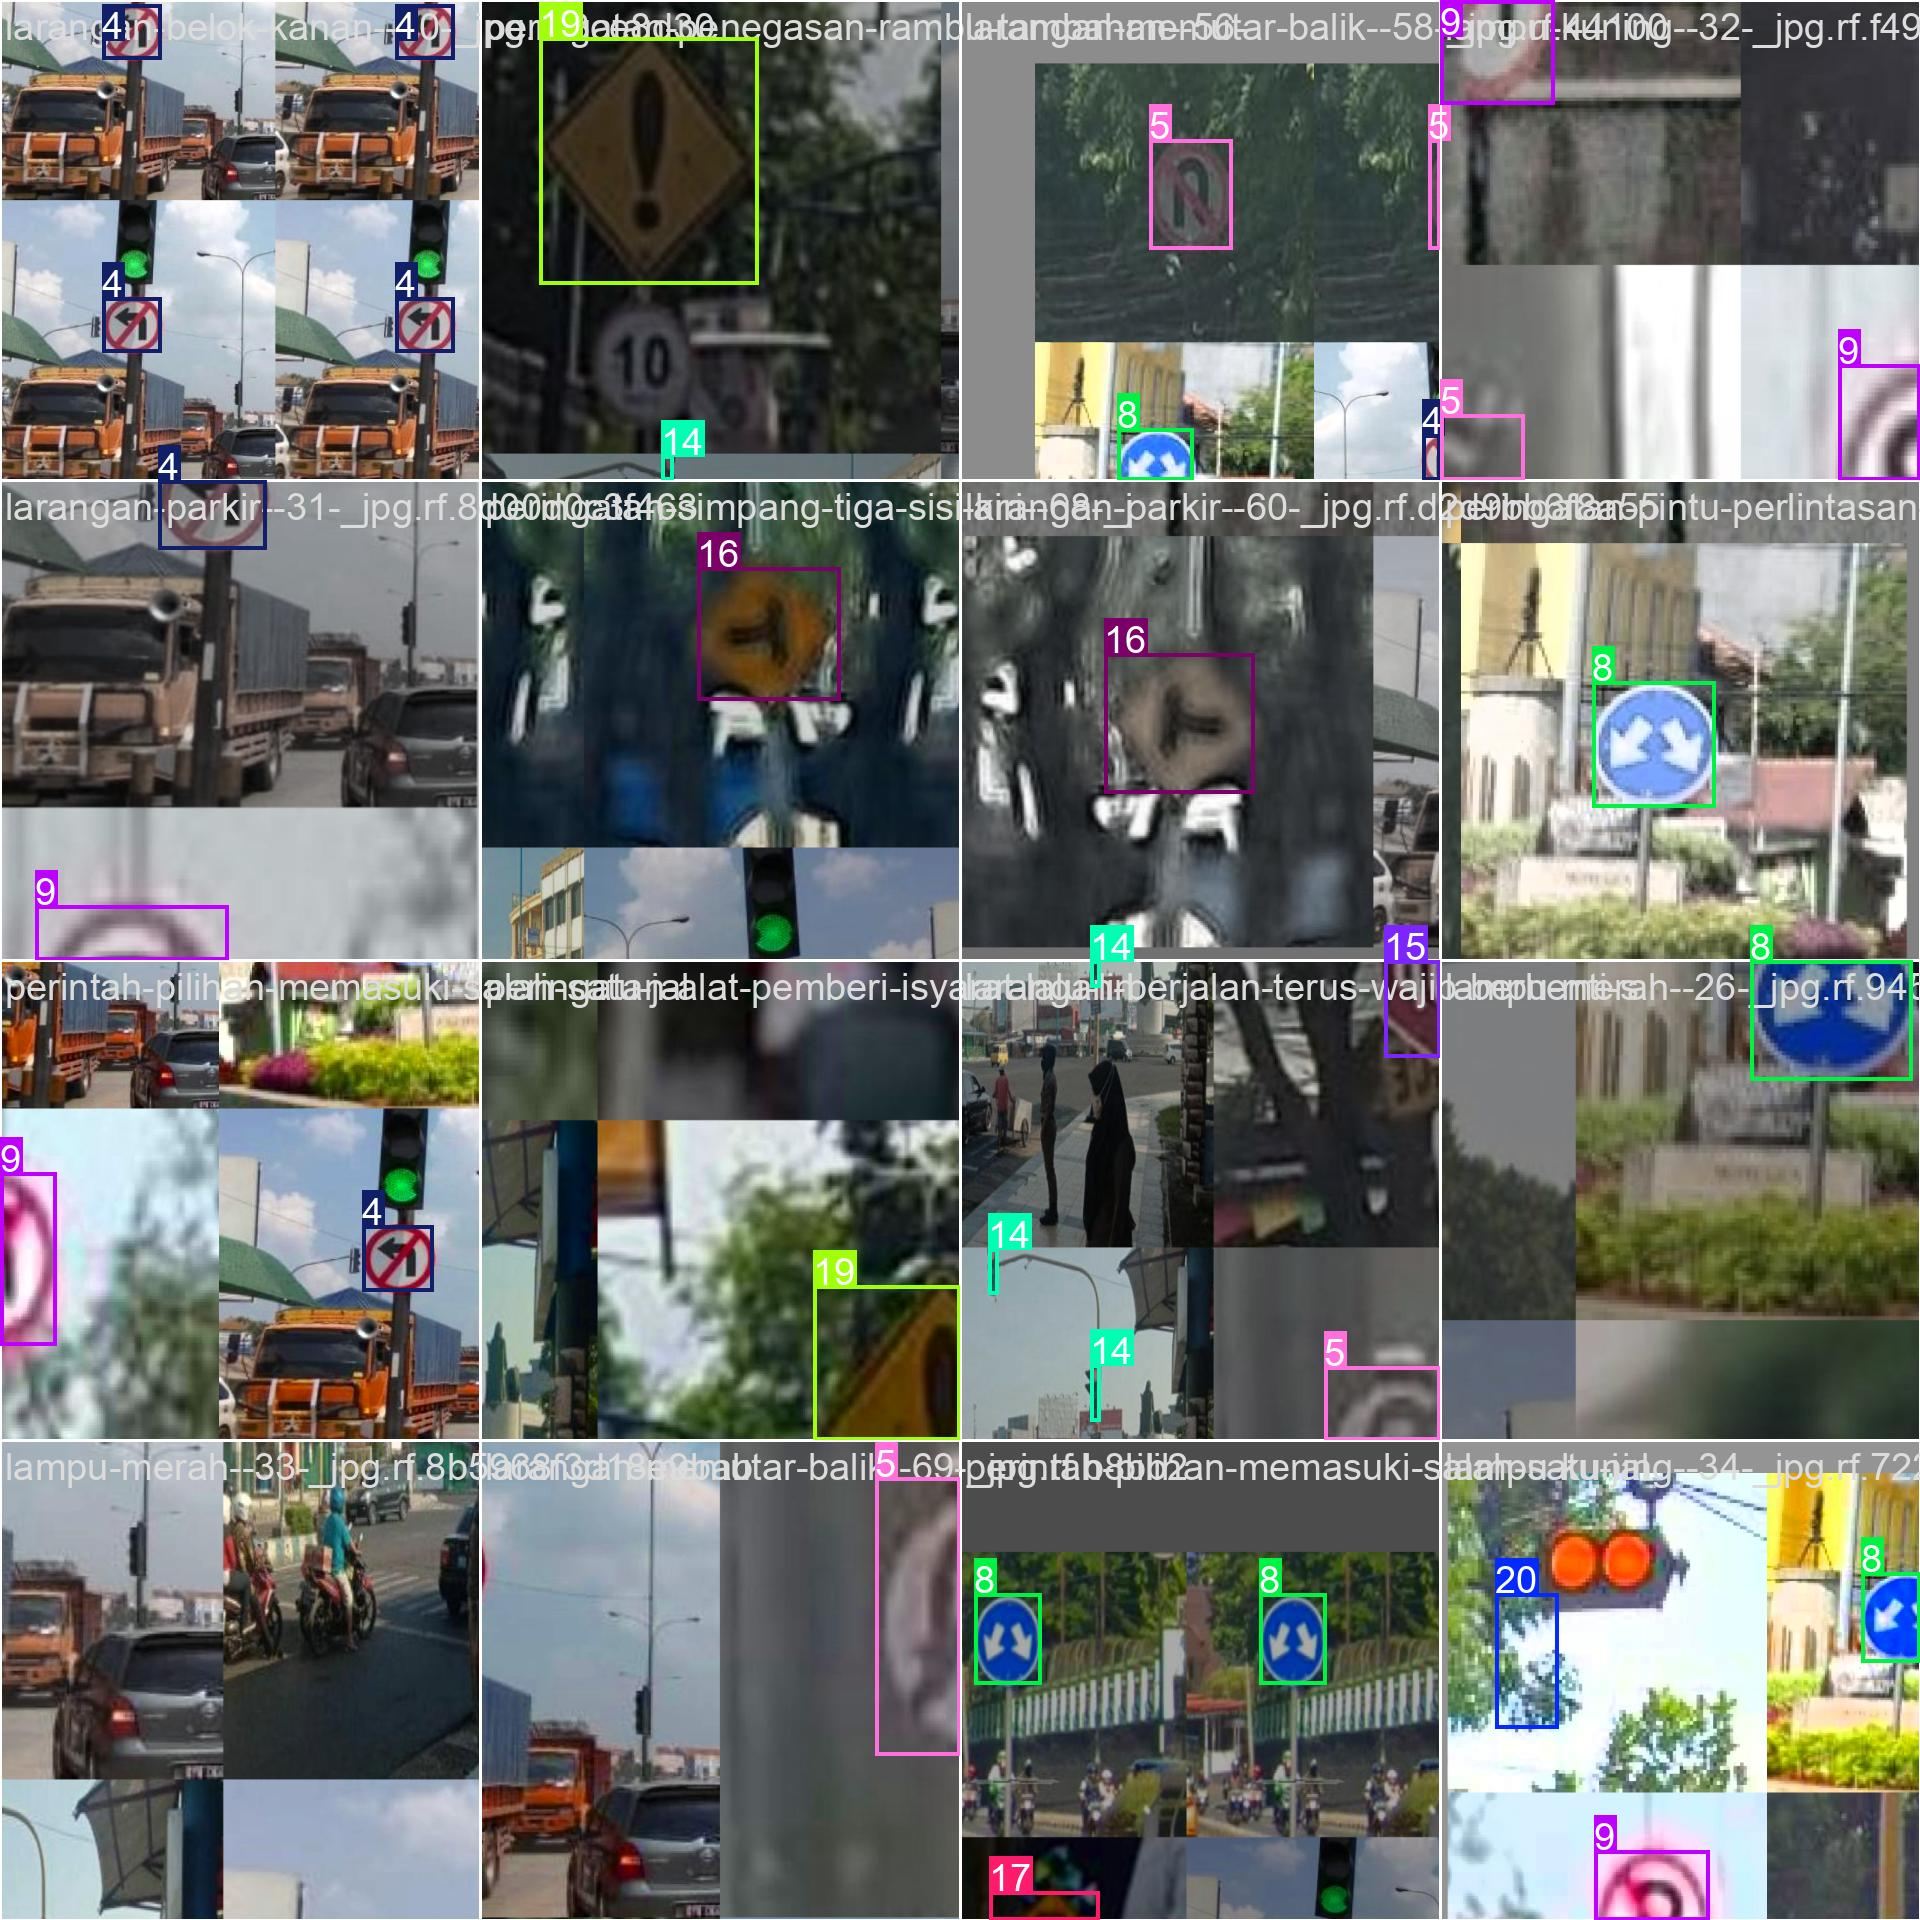

In [ ]:
Image(filename=f"{HOME}/runs/detect/train/train_batch0.jpg")

# Validating Custom Model

In [ ]:

model = YOLO("/content/runs/detect/train/weights/best.pt") 
model.val(
    data="{dataset.location}/data.yaml"  
)

#? Alternative approach to vaidae the model
# !yolo task=detect mode=val model = "/content/runs/detect/train/weights/best.pt" data = {dataset.location}/data.yaml

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLO11s summary (fused): 238 layers, 9,420,927 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/road-signs-2/valid/labels.cache... 488 images, 0 backgrounds, 0 corrupt: 100% 488/488 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:03<00:00,  8.31it/s]
                   all        488        529      0.947       0.94      0.967      0.828
          do_not_enter         30         30      0.964          1      0.994      0.936
           do_not_stop         30         30      0.934      0.944       0.97      0.901
         do_not_turn_l         30         34      0.946          1      0.995      0.913
         do_not_turn_r         30         31      0.967      0.957      0.971      0.929
         do_not_u_turn         30         30          1      0.955      0.974      0.859
       enter_left_lane    

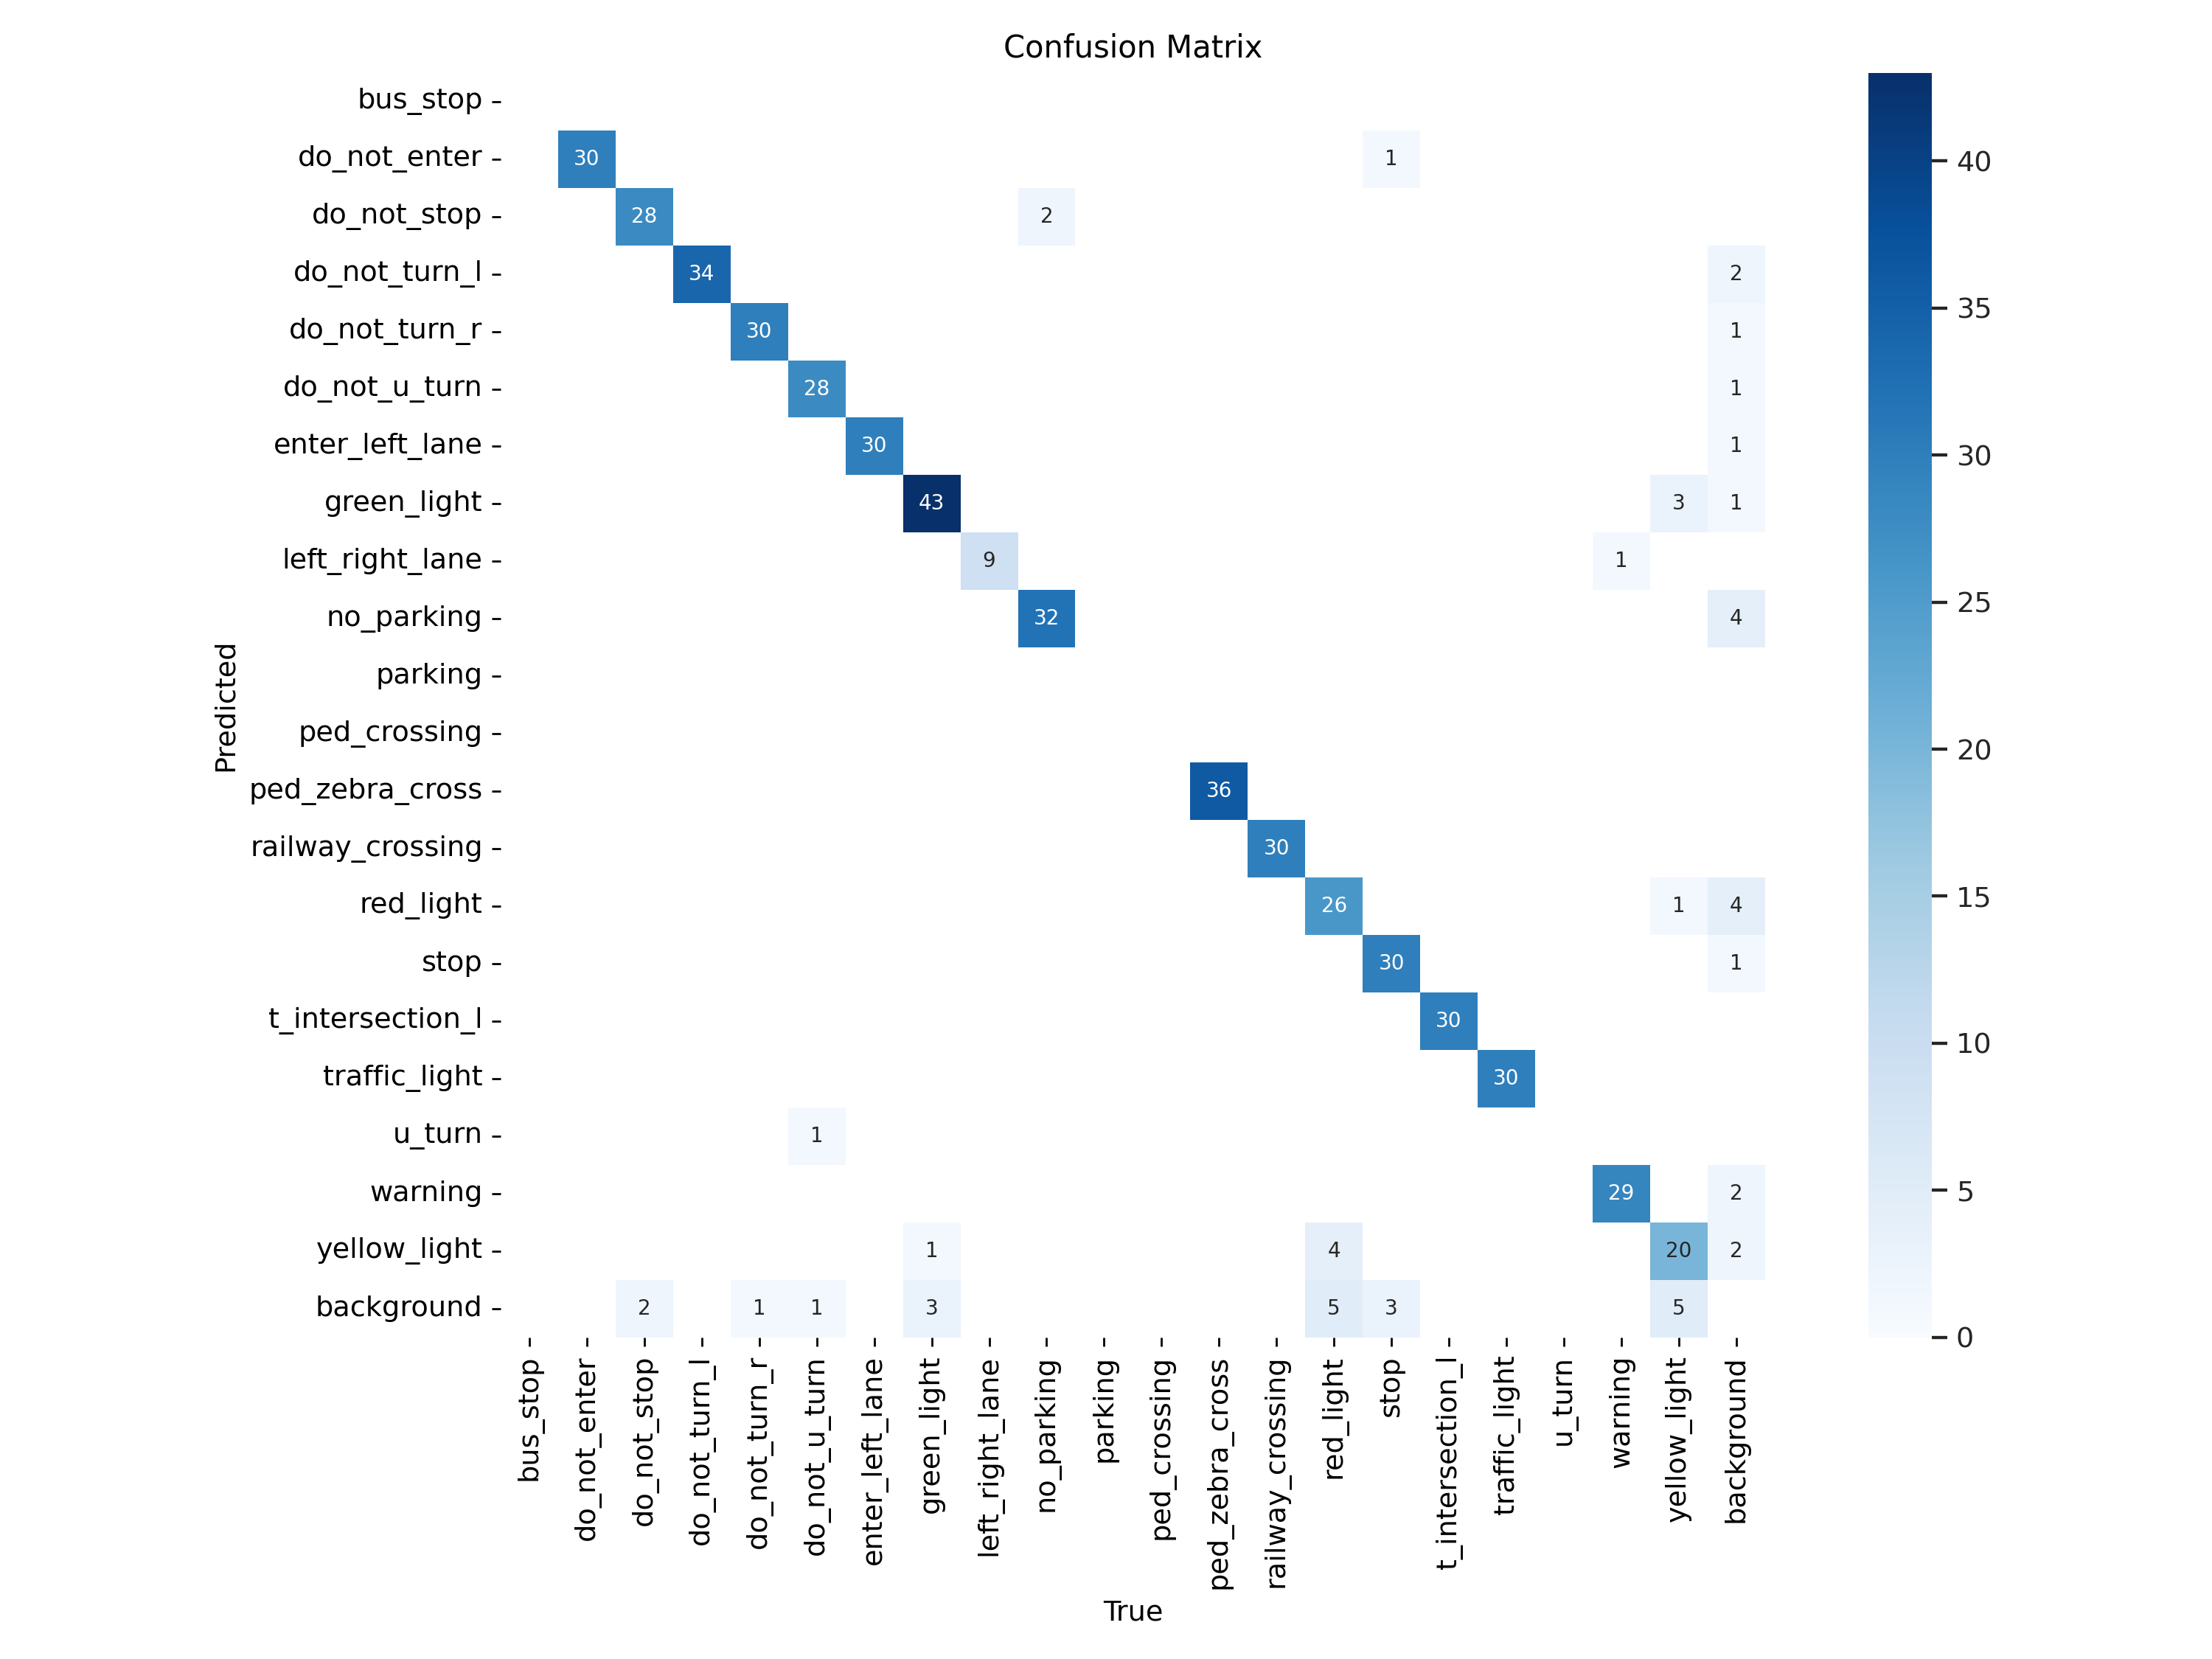

In [ ]:
Image(filename=f"{HOME}/runs/detect/val/confusion_matrix.png")

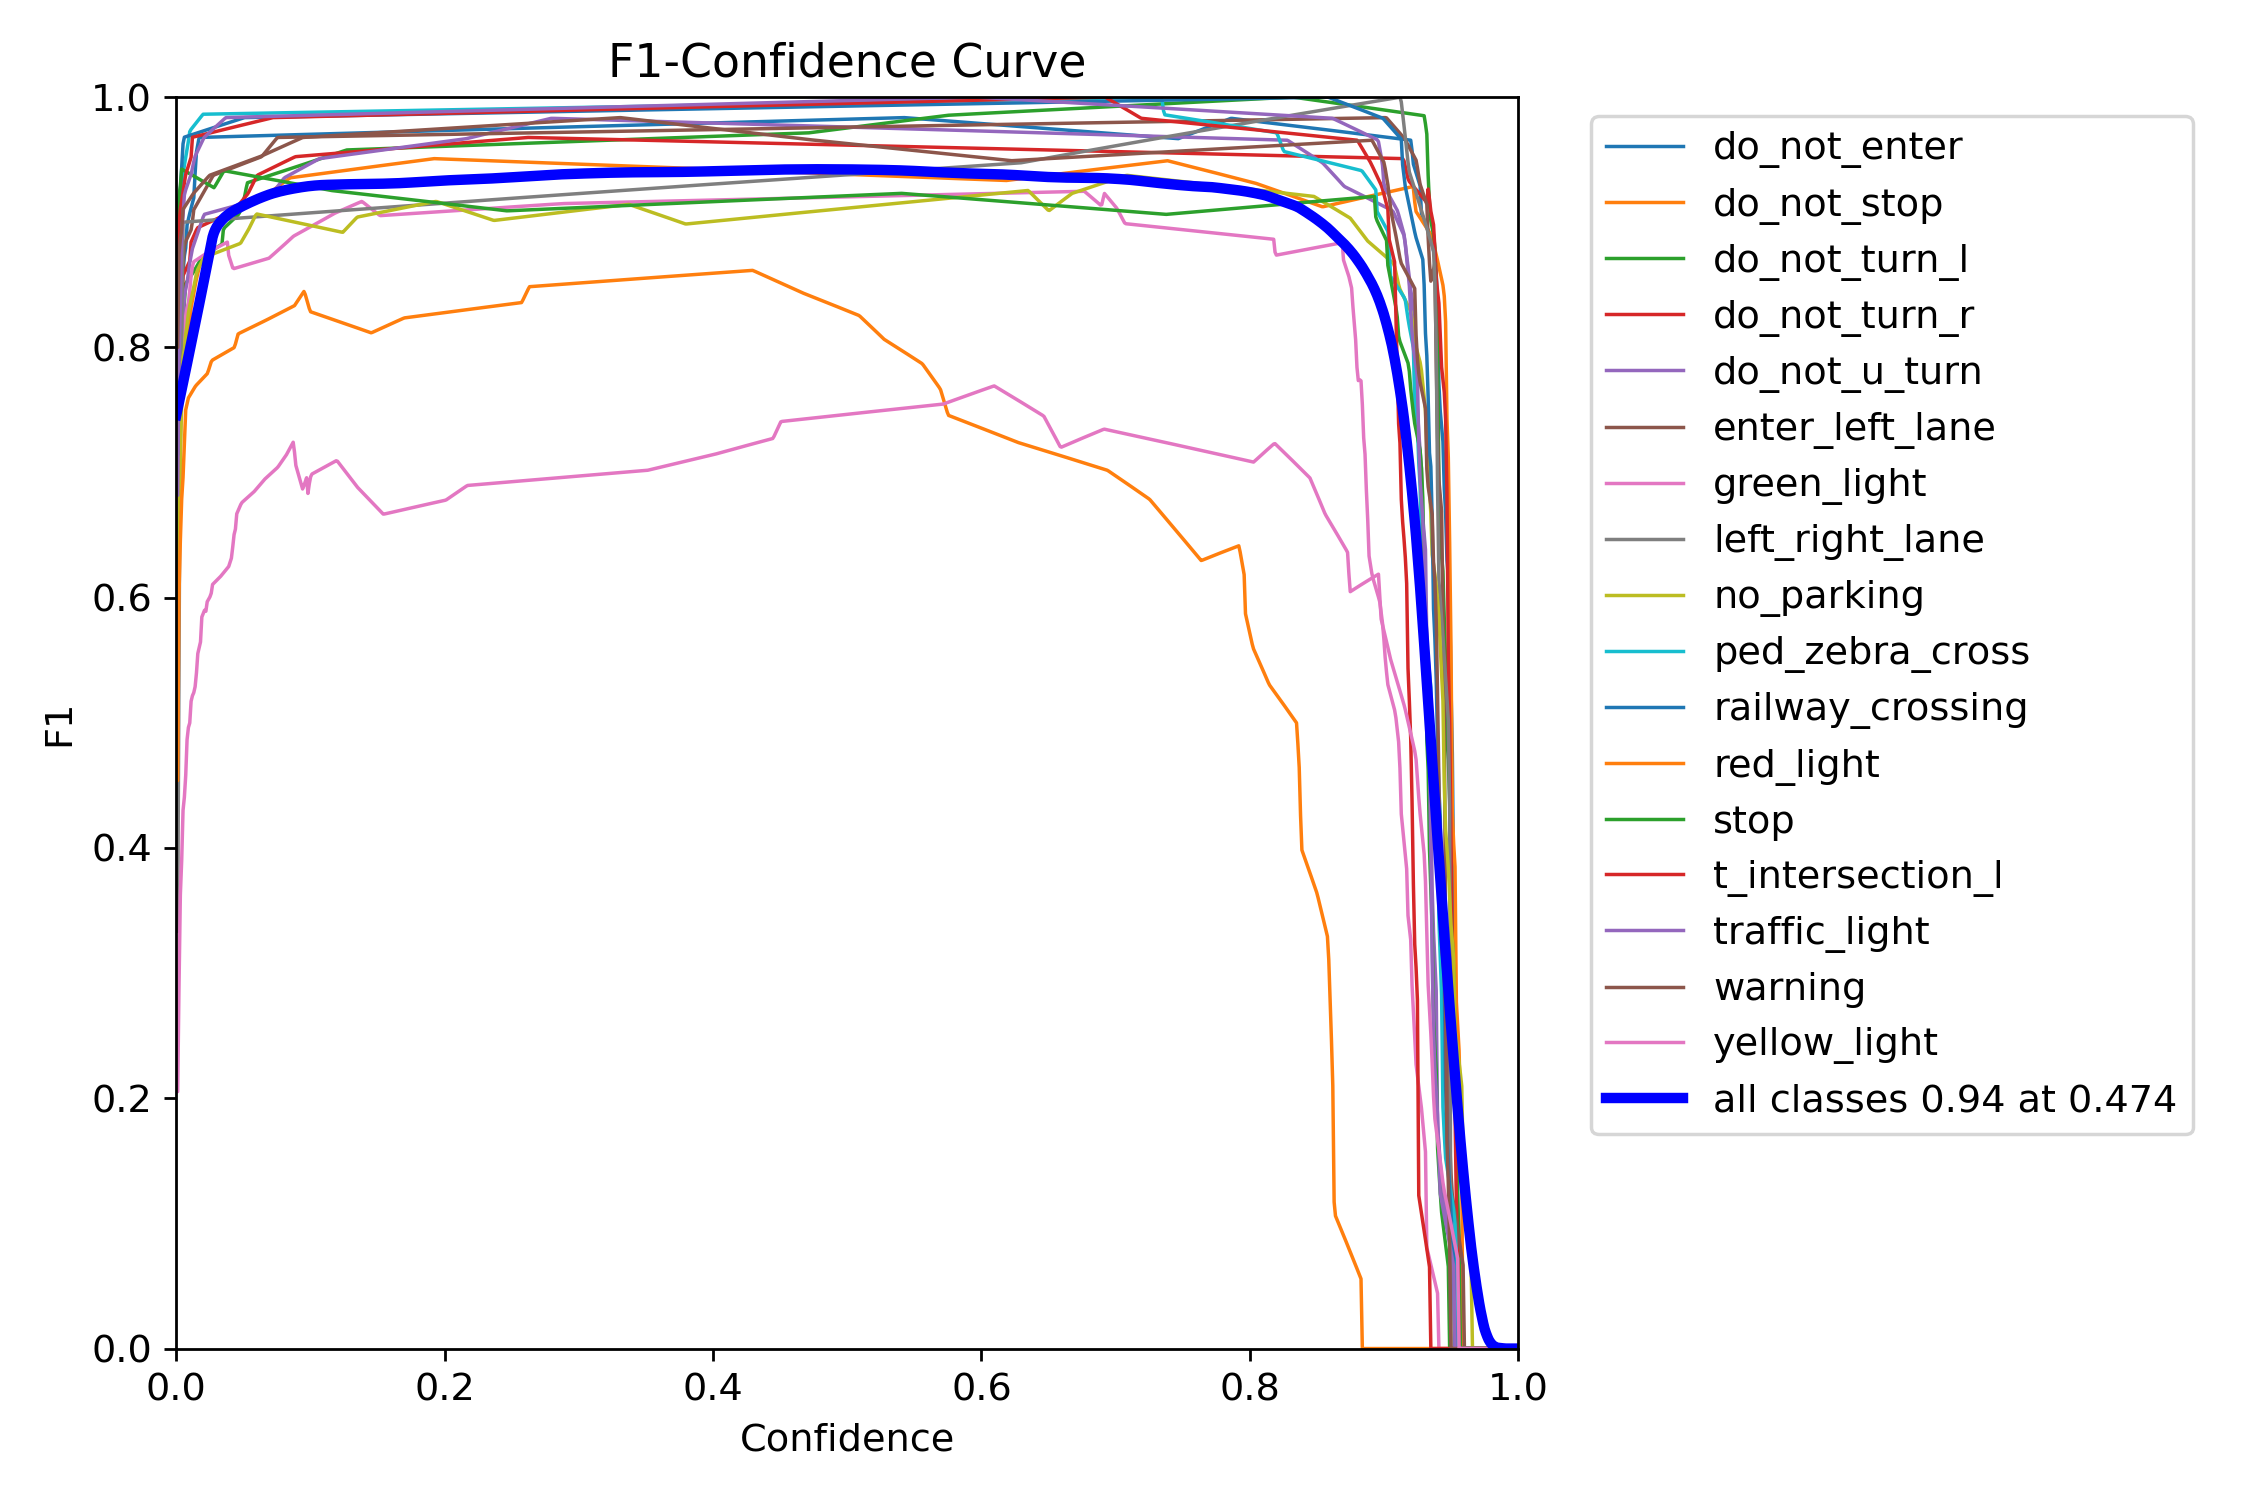

In [ ]:
Image(filename=f"{HOME}/runs/detect/val/F1_curve.png")